In [1]:
import numpy as np 
import obspy
import matplotlib.pyplot as plt
import os,glob
import pandas as pd
import pystp
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import importlib

os.chdir('C:/Users/lan66/4th year project/2nd term')
import edphscoh as phscoh
import testappstf as testappstf

import os
import re

Edit to local directory to where inventory and filtered waveforms are saved

In [49]:
#load saved inventory
client = Client("IRIS")
os.chdir('C:/Users/lan66/4th year project/2nd term/earthquake11')
inv = obspy.read_inventory("inventory11.xml")

In [11]:
#load saved waveforms
st_all = obspy.read("filttraces11.mseed")
print(st_all)

94 Trace(s) in Stream:

AE.113A..HHZ | 2017-05-29T18:50:00.000000Z - 2017-05-29T19:30:00.000000Z | 100.0 Hz, 240001 samples
...
(92 other traces)
...
YN.TR04..HHZ | 2017-05-29T18:50:00.004500Z - 2017-05-29T19:29:59.994500Z | 100.0 Hz, 240000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Select all stations from txt file to append in obspy stream

In [12]:
st=obspy.Stream()

st=st+st_all.select(station="BZN", channel="HHZ")
st=st+st_all.select(station="FRD", channel="HHZ")
st=st+st_all.select(station="KNW", channel="HHZ")
st=st+st_all.select(station="LVA2", channel="HHZ")
st=st+st_all.select(station="PFO", channel="HHZ")
st=st+st_all.select(station="RDM", channel="HHZ")
st=st+st_all.select(station="RRSP", channel="HHZ")
st=st+st_all.select(station="SMER", channel="HHZ")
st=st+st_all.select(station="SND", channel="HHZ")
st=st+st_all.select(station="TMSP", channel="HHZ")
st=st+st_all.select(station="TRO", channel="HHZ")
st=st+st_all.select(station="DGR", channel="HHZ")
st=st+st_all.select(station="PLM", channel="HHZ")
st=st+st_all.select(station="B082", channel="HHZ")
st=st+st_all.select(station="B084", channel="HHZ")
st=st+st_all.select(station="B086", channel="HHZ")
st=st+st_all.select(station="B087", channel="HHZ")
st=st+st_all.select(station="B088", channel="HHZ")
st=st+st_all.select(station="B093", channel="HHZ")
st=st+st_all.select(station="BPH01", channel="HHZ")
st=st+st_all.select(station="BPH02", channel="HHZ")
st=st+st_all.select(station="BPH03", channel="HHZ")
st=st+st_all.select(station="BPH04", channel="HHZ")
st=st+st_all.select(station="BPH05", channel="HHZ")
st=st+st_all.select(station="BPH06", channel="HHZ")
st=st+st_all.select(station="BPH07", channel="HHZ")
st=st+st_all.select(station="BPH08", channel="HHZ")
st=st+st_all.select(station="BPH09", channel="HHZ")
st=st+st_all.select(station="BPH10", channel="HHZ")
st=st+st_all.select(station="BPH11", channel="HHZ")
st=st+st_all.select(station="BPH12", channel="HHZ")
st=st+st_all.select(station="BPH13", channel="HHZ")
st=st+st_all.select(station="TPFO", channel="HHZ")
st=st+st_all.select(station="GVAR1", channel="HHZ")
st=st+st_all.select(station="JORD", channel="HHZ")
st=st+st_all.select(station="RHIL", channel="HHZ")
st=st+st_all.select(station="TFRD", channel="HHZ")
st=st+st_all.select(station="TR02", channel="HHZ")
st=st+st_all.select(station="TR03", channel="HHZ")
st=st+st_all.select(station="TR04", channel="HHZ")
print(st)


40 Trace(s) in Stream:

AZ.BZN..HHZ | 2017-05-29T18:50:00.008400Z - 2017-05-29T19:29:59.998400Z | 100.0 Hz, 240000 samples
...
(38 other traces)
...
YN.TR04..HHZ | 2017-05-29T18:50:00.004500Z - 2017-05-29T19:29:59.994500Z | 100.0 Hz, 240000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Edit fname to the txt file of stations, and t1 to include all of foreshock sequence

In [28]:
def read_arrivals(fname="arrivalseq11.txt",st=obspy.Stream()):
    """
    1-sentence description
    
    Parameters
    ----------
    fname:
       list of t0 P-wave arrivals for stations with clear signals
    st :
       stream of stations selected in fname

    Returns
    -------
    arvl :
       dictionary of UTCdatetime version of t0 p wave arrival
    """

    
    vls = np.loadtxt(fname,delimiter=",",dtype=str)
    vls=np.atleast_2d(vls)
    
    # create a dictionary of arrival times
    arvl={}
    for k in range(0,vls.shape[0]):
        dt=vls[k,1:]
        arvl[vls[k,0]]=obspy.UTCDateTime(int(dt[0]),int(dt[1]),int(dt[2]),int(dt[3]),int(dt[4]))+float(dt[5])


    # for each trace in the stream, look up the arrivals
    for tr in st:
        dt=arvl.get('.'.join([tr.stats.network,tr.stats.station]),None)
        if dt is not None:
            tr.stats.t0=dt-tr.stats.starttime
            tr.stats.t1=tr.stats.t0-25
            #print(tr, tr.stats)
            
            

    return arvl

arvl=read_arrivals(st=st)
print(arvl)


{'AZ.BZN': UTCDateTime(2017, 5, 29, 19, 0, 59, 500000), 'AZ.FRD': UTCDateTime(2017, 5, 29, 19, 0, 59, 400000), 'AZ.KNW': UTCDateTime(2017, 5, 29, 19, 0, 59, 900000), 'AZ.LVA2': UTCDateTime(2017, 5, 29, 19, 1, 1, 600000), 'AZ.PFO': UTCDateTime(2017, 5, 29, 19, 0, 59, 900000), 'AZ.RDM': UTCDateTime(2017, 5, 29, 19, 1, 0, 500000), 'AZ.RRSP': UTCDateTime(2017, 5, 29, 19, 0, 59, 700000), 'AZ.SMER': UTCDateTime(2017, 5, 29, 19, 1, 5), 'AZ.SND': UTCDateTime(2017, 5, 29, 19, 0, 59), 'AZ.TMSP': UTCDateTime(2017, 5, 29, 19, 0, 59, 200000), 'AZ.TRO': UTCDateTime(2017, 5, 29, 19, 1, 0, 600000), 'CI.DGR': UTCDateTime(2017, 5, 29, 19, 1, 2, 600000), 'CI.PLM': UTCDateTime(2017, 5, 29, 19, 1, 2, 550000), 'PB.B082': UTCDateTime(2017, 5, 29, 19, 0, 58, 700000), 'PB.B084': UTCDateTime(2017, 5, 29, 19, 0, 59, 900000), 'PB.B086': UTCDateTime(2017, 5, 29, 19, 0, 59, 200000), 'PB.B087': UTCDateTime(2017, 5, 29, 19, 0, 59, 400000), 'PB.B088': UTCDateTime(2017, 5, 29, 19, 1, 0, 900000), 'PB.B093': UTCDateTime(

In [30]:
#prints arrival times based on t0 and t1
print('Arrival times for mainshock:')
for trace in st:
    print(f"{trace.stats.starttime + trace.stats.t0}") 

print('Arrival times for foreshock:')
for trace in st:
    print(f"{trace.stats.starttime + trace.stats.t1}")

Arrival times for mainshock
2017-05-29T19:00:59.500000Z
2017-05-29T19:00:59.400000Z
2017-05-29T19:00:59.900000Z
2017-05-29T19:01:01.600000Z
2017-05-29T19:00:59.900000Z
2017-05-29T19:01:00.500000Z
2017-05-29T19:00:59.700000Z
2017-05-29T19:01:05.000000Z
2017-05-29T19:00:59.000000Z
2017-05-29T19:00:59.200000Z
2017-05-29T19:01:00.600000Z
2017-05-29T19:01:02.600000Z
2017-05-29T19:01:02.550000Z
2017-05-29T19:00:58.700000Z
2017-05-29T19:00:59.900000Z
2017-05-29T19:00:59.200000Z
2017-05-29T19:00:59.400000Z
2017-05-29T19:01:00.900000Z
2017-05-29T19:00:59.550000Z
2017-05-29T19:01:00.000000Z
2017-05-29T19:00:59.950000Z
2017-05-29T19:00:59.950000Z
2017-05-29T19:00:59.950000Z
2017-05-29T19:00:59.950000Z
2017-05-29T19:01:00.000000Z
2017-05-29T19:00:59.950000Z
2017-05-29T19:00:59.950000Z
2017-05-29T19:00:59.900000Z
2017-05-29T19:01:00.000000Z
2017-05-29T19:01:00.000000Z
2017-05-29T19:00:59.900000Z
2017-05-29T19:00:59.900000Z
2017-05-29T19:01:00.000000Z
2017-05-29T19:00:59.400000Z
2017-05-29T19:00:59.

Change start and end time where necessary

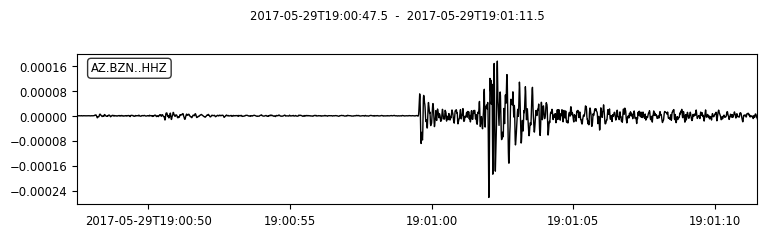

t0: 659.4916
t1: 634.4916


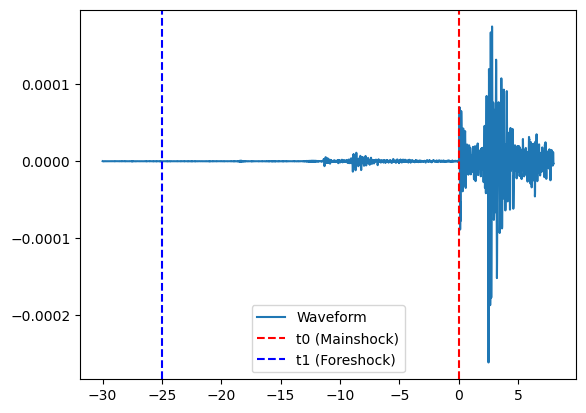

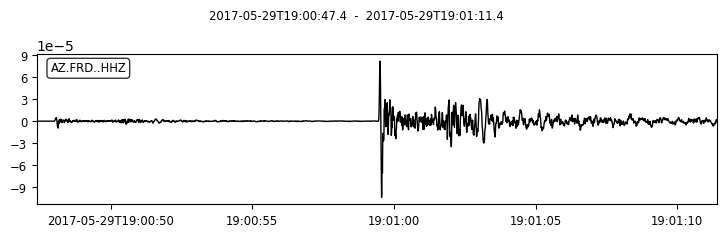

t0: 659.3916
t1: 634.3916


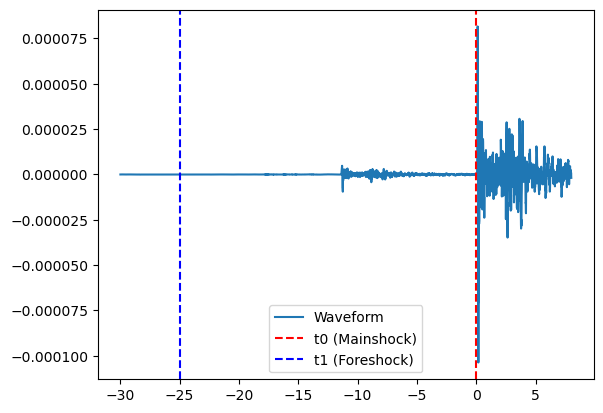

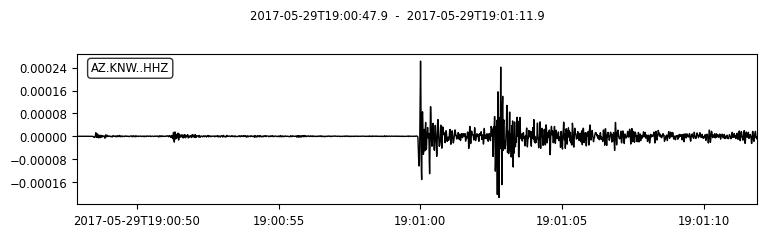

t0: 659.8916
t1: 634.8916


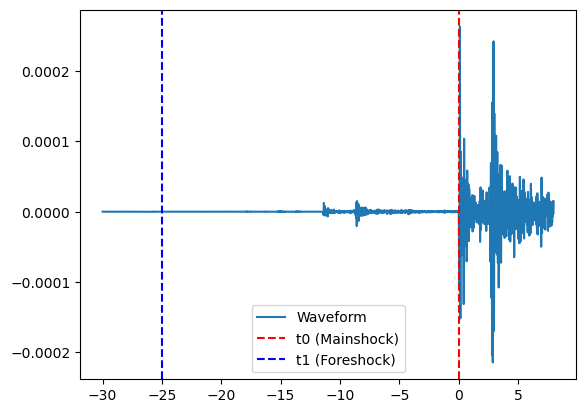

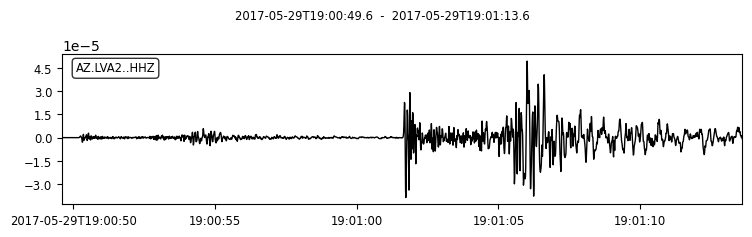

t0: 661.5969
t1: 636.5969


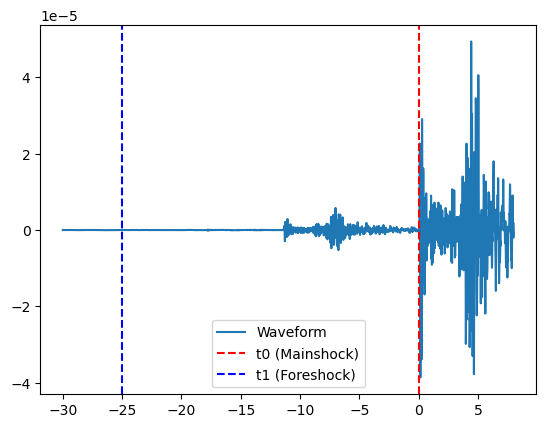

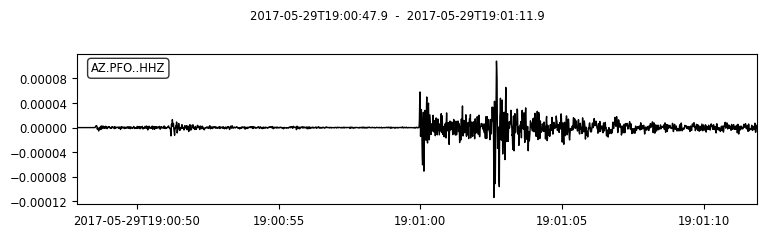

t0: 659.8916
t1: 634.8916


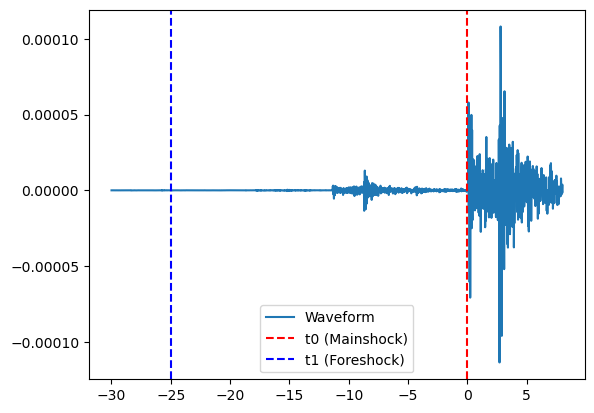

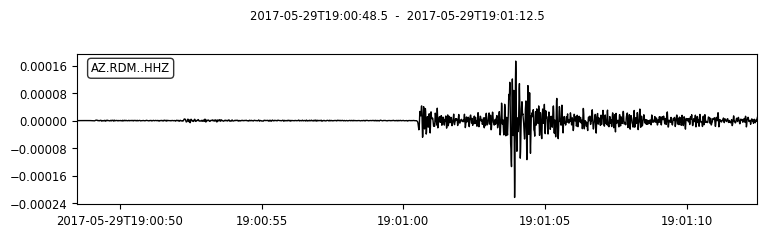

t0: 660.4916
t1: 635.4916


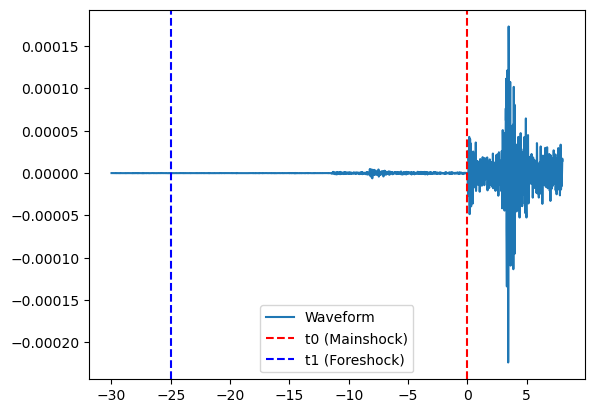

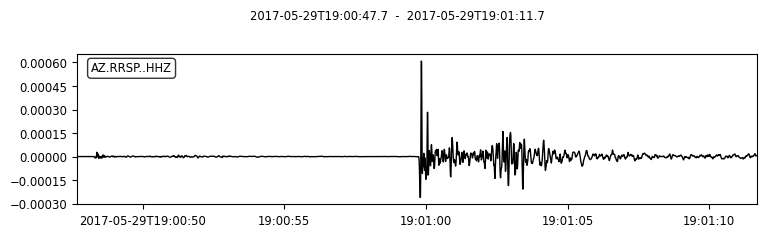

t0: 659.6955
t1: 634.6955


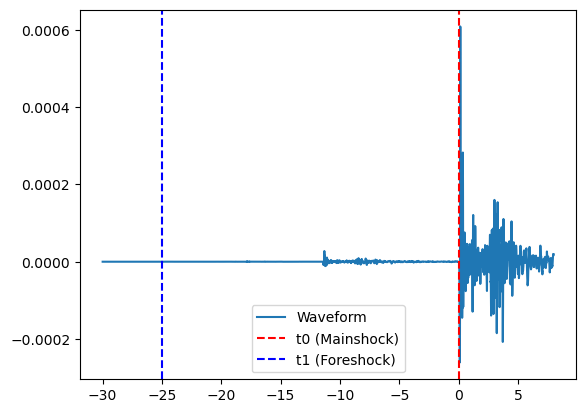

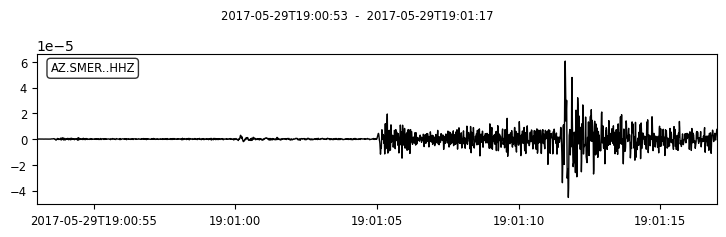

t0: 664.9916
t1: 639.9916


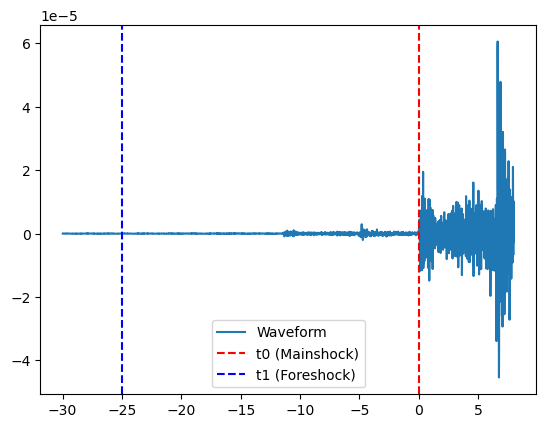

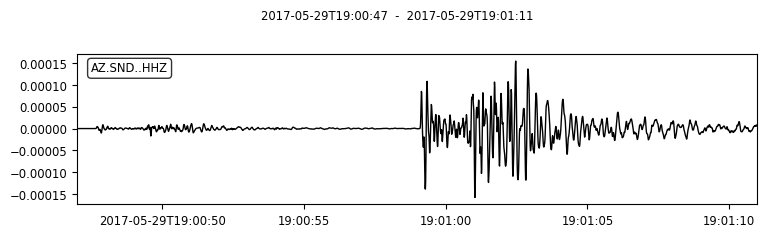

t0: 658.9916
t1: 633.9916


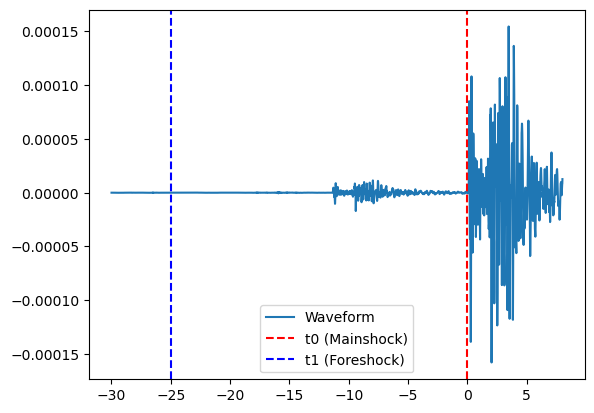

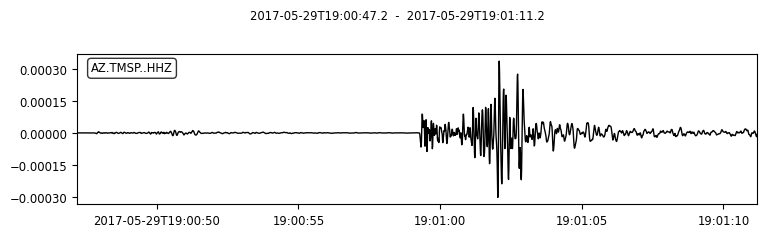

t0: 659.1955
t1: 634.1955


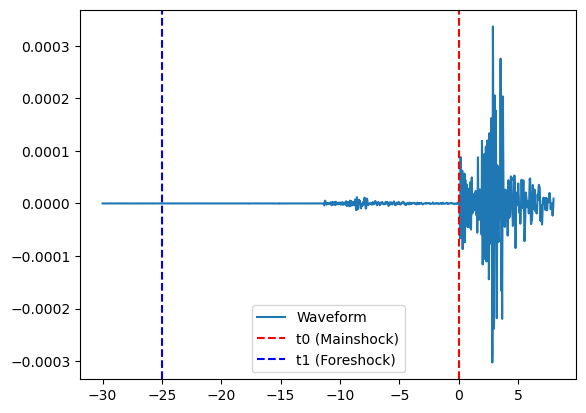

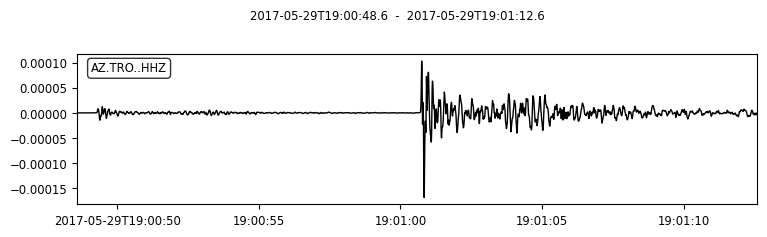

t0: 660.5916
t1: 635.5916


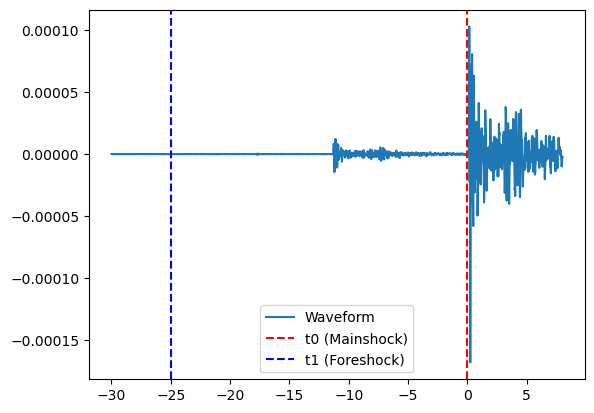

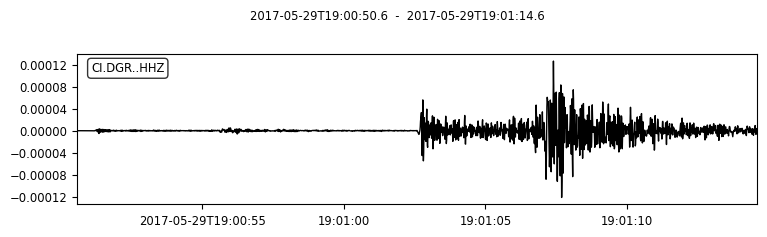

t0: 662.591607
t1: 637.591607


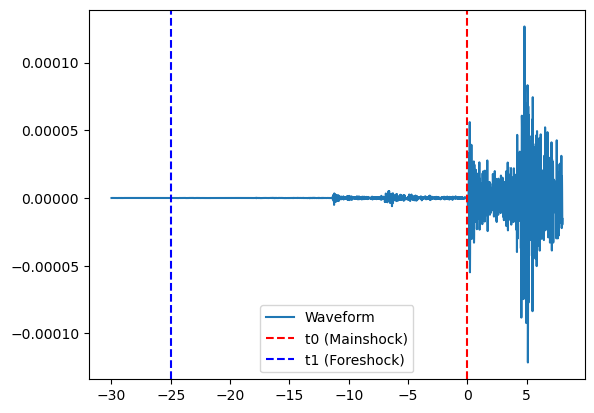

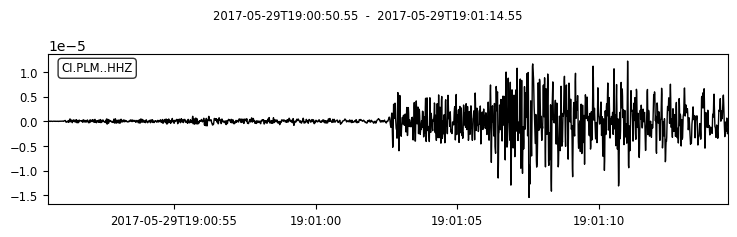

t0: 662.541607
t1: 637.541607


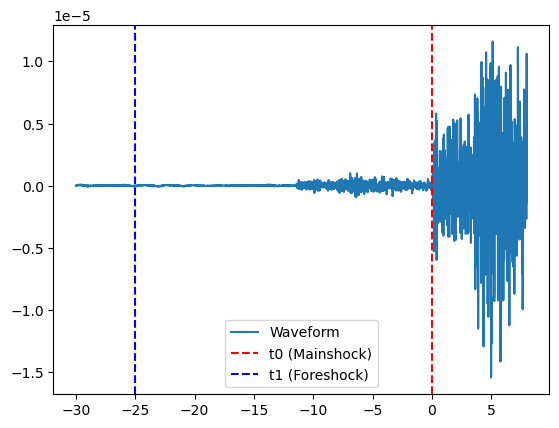

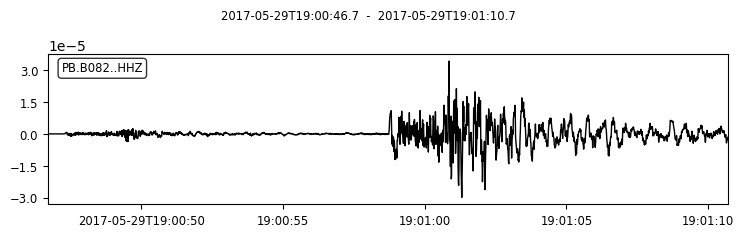

t0: 658.6955
t1: 633.6955


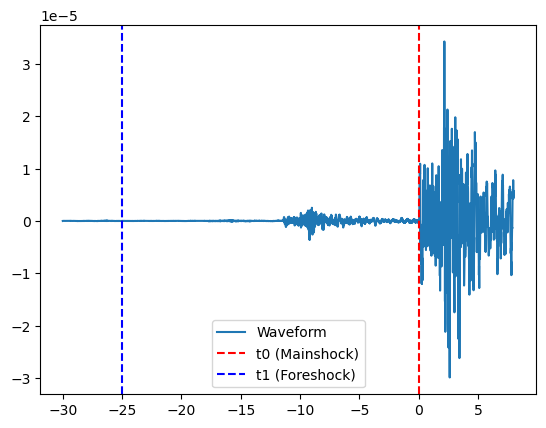

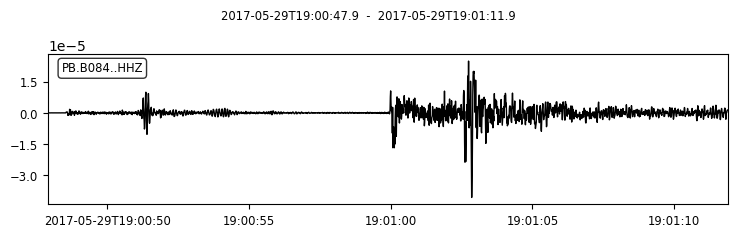

t0: 659.8955
t1: 634.8955


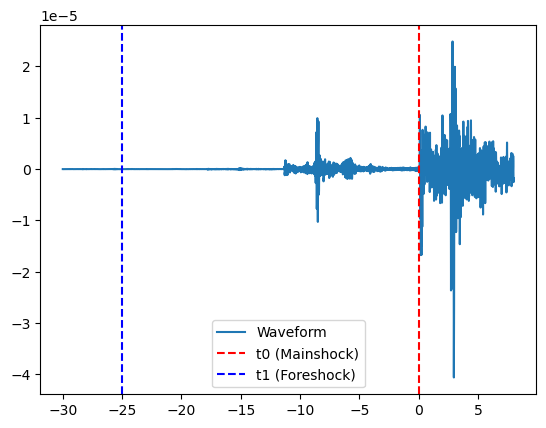

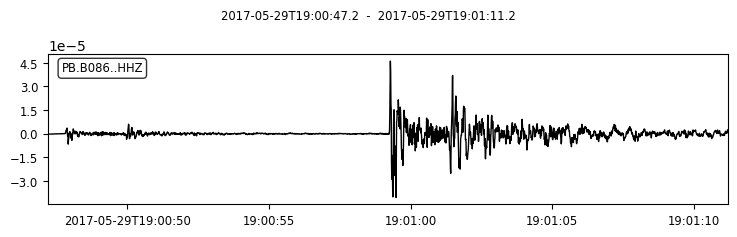

t0: 659.1955
t1: 634.1955


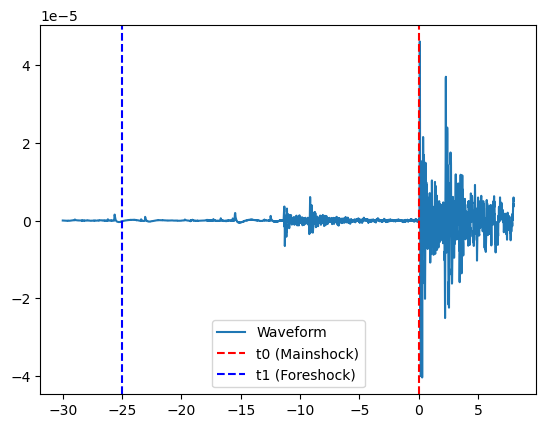

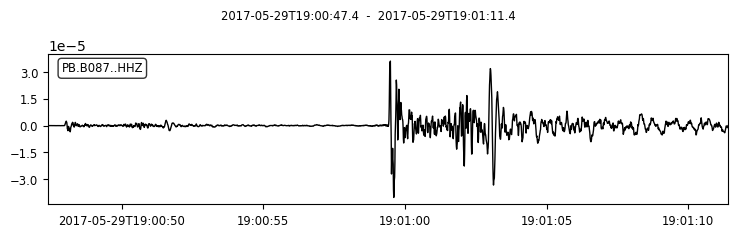

t0: 659.3955
t1: 634.3955


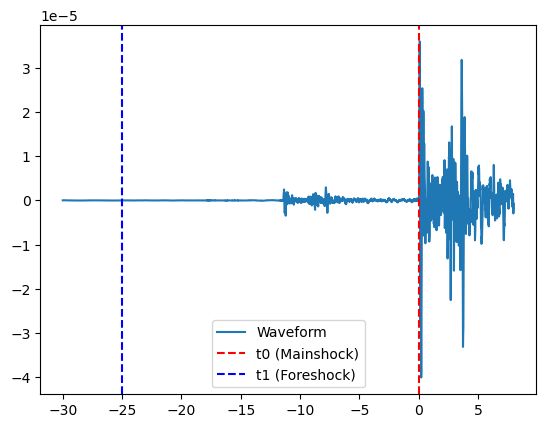

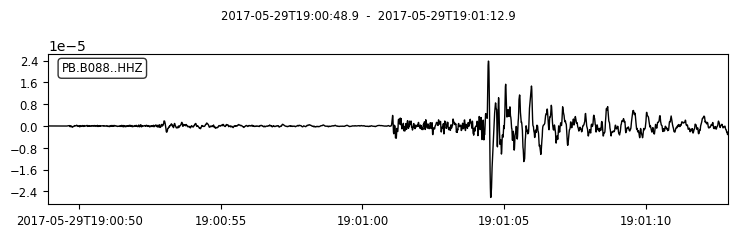

t0: 660.8955
t1: 635.8955


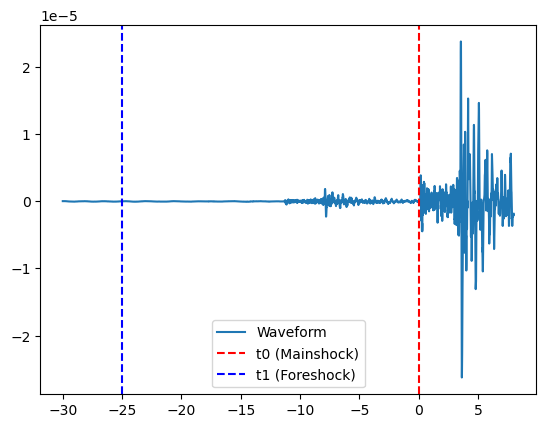

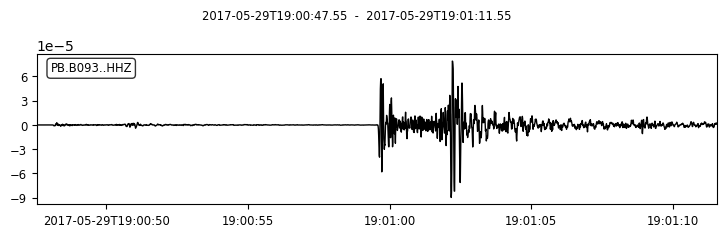

t0: 659.5455
t1: 634.5455


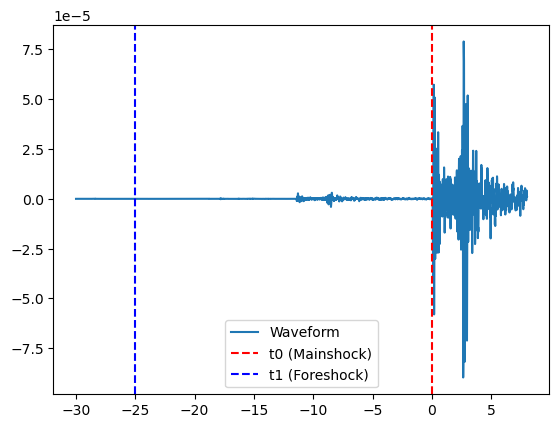

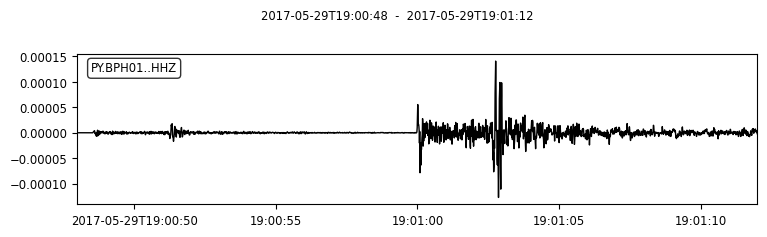

t0: 660.0
t1: 635.0


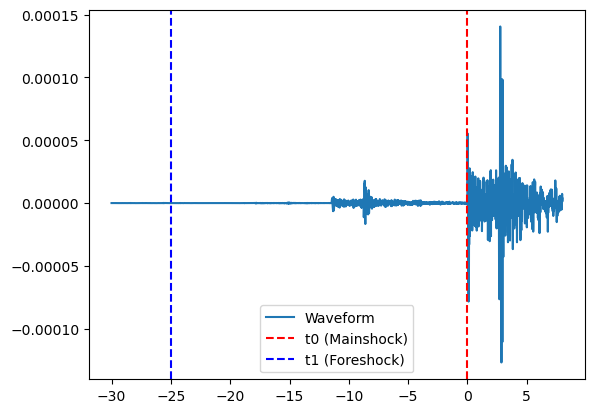

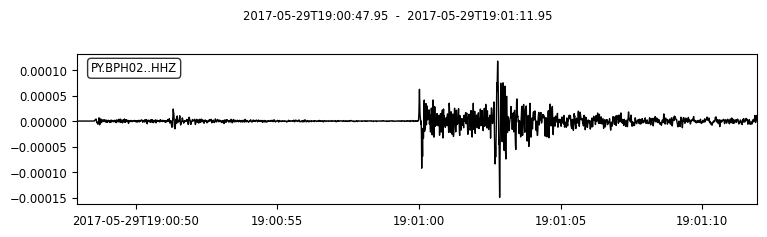

t0: 659.95
t1: 634.95


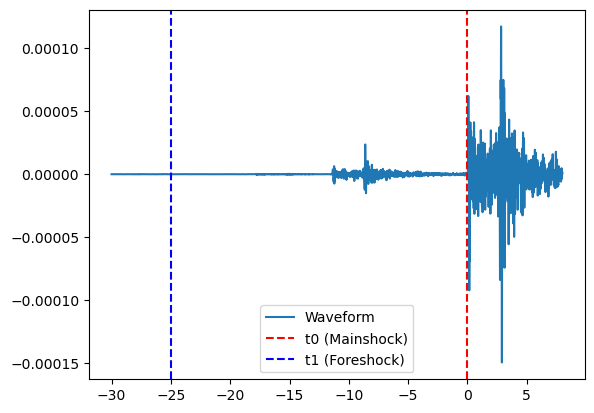

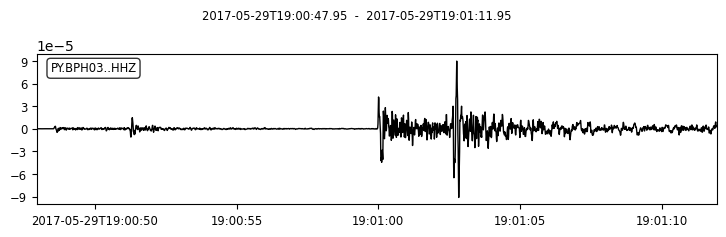

t0: 659.95
t1: 634.95


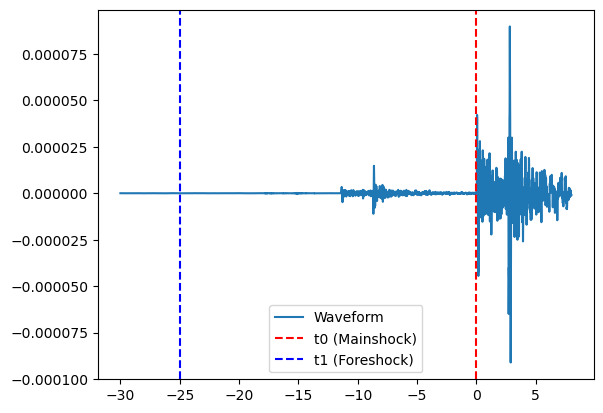

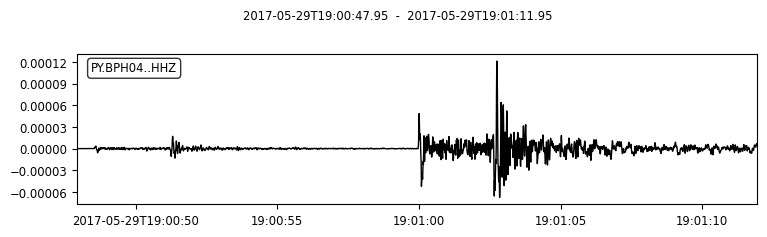

t0: 659.95
t1: 634.95


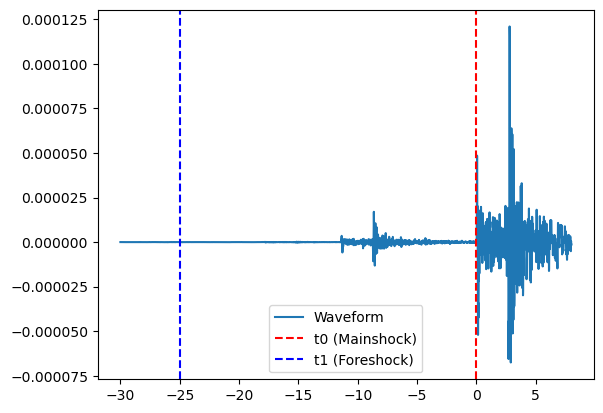

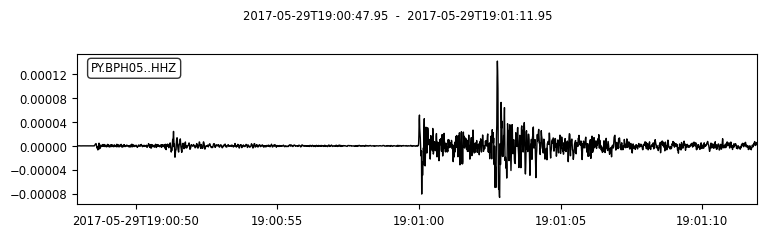

t0: 659.95
t1: 634.95


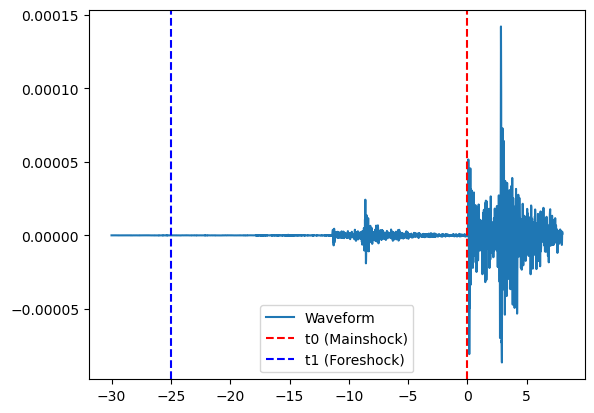

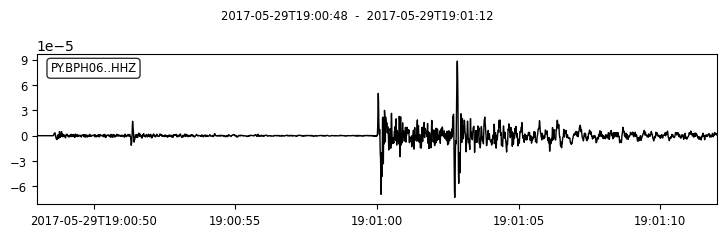

t0: 660.0
t1: 635.0


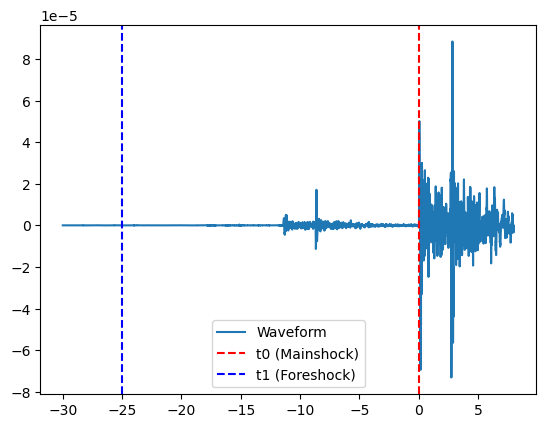

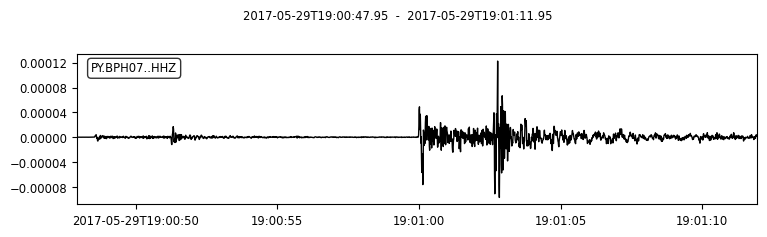

t0: 659.95
t1: 634.95


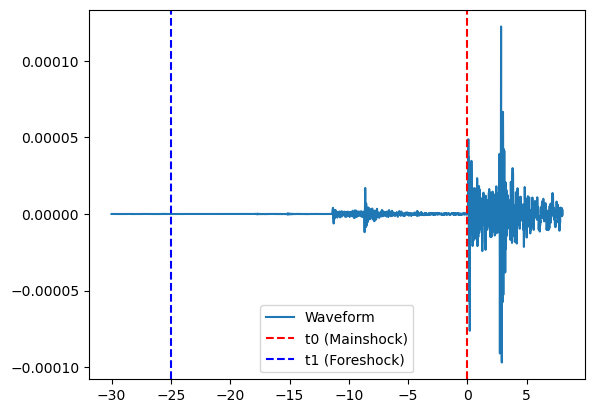

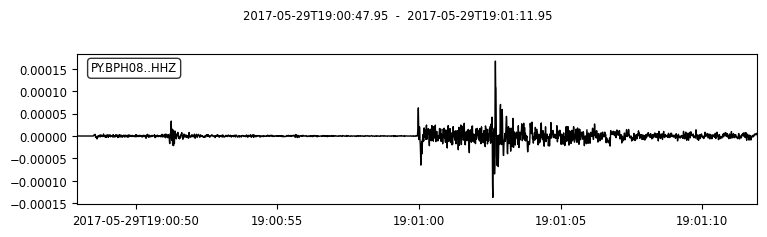

t0: 659.95
t1: 634.95


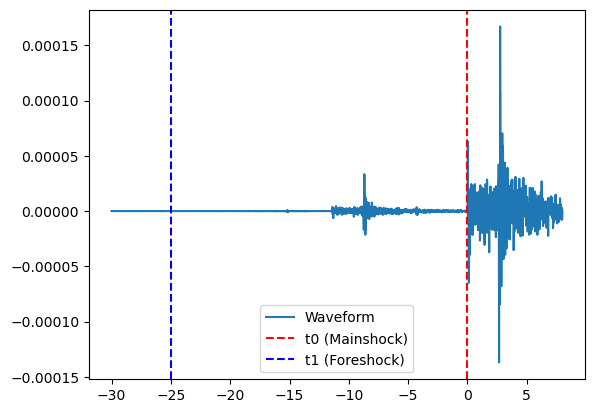

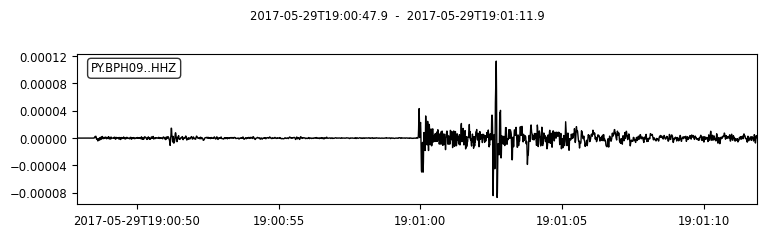

t0: 659.9
t1: 634.9


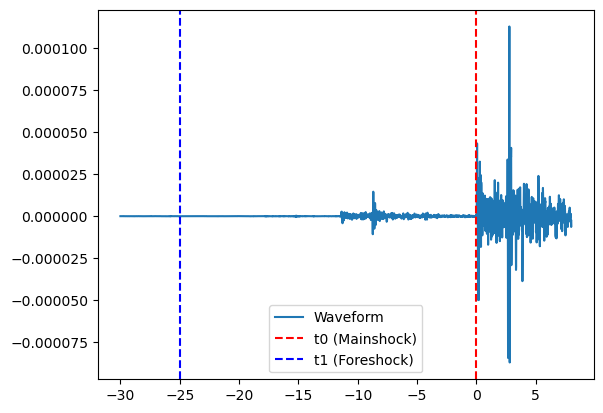

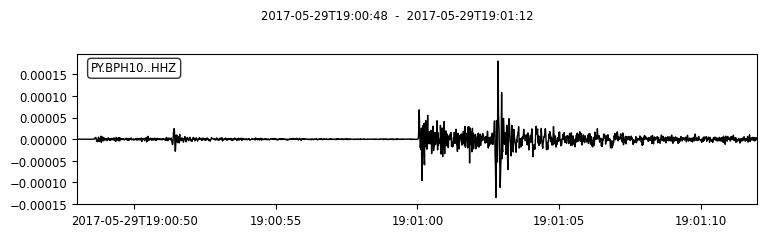

t0: 660.0
t1: 635.0


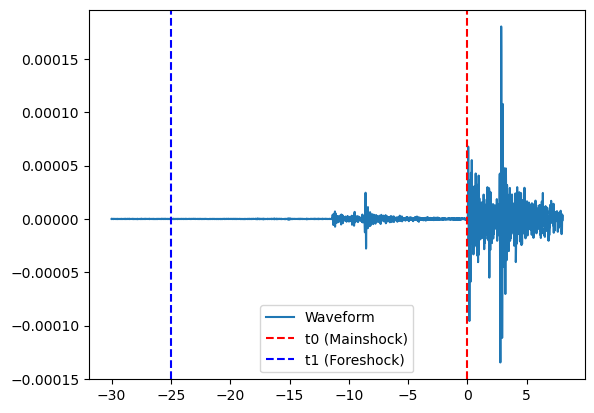

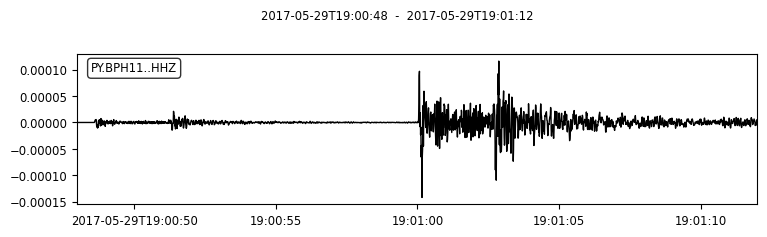

t0: 660.0
t1: 635.0


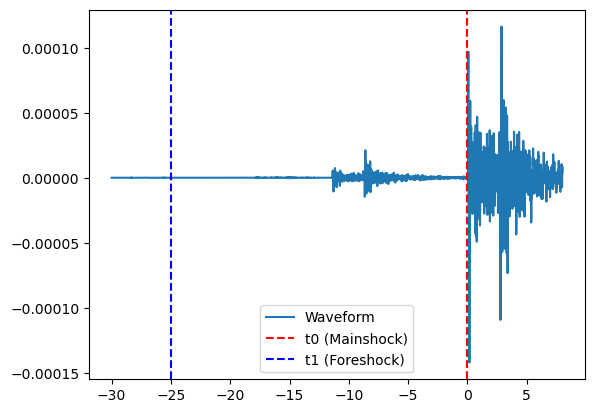

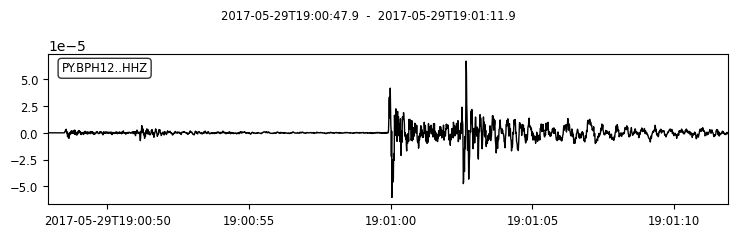

t0: 659.9
t1: 634.9


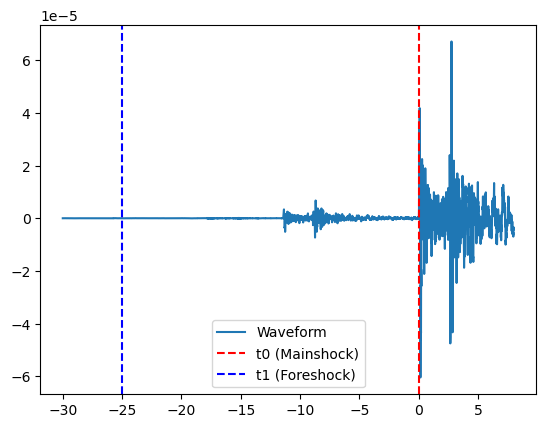

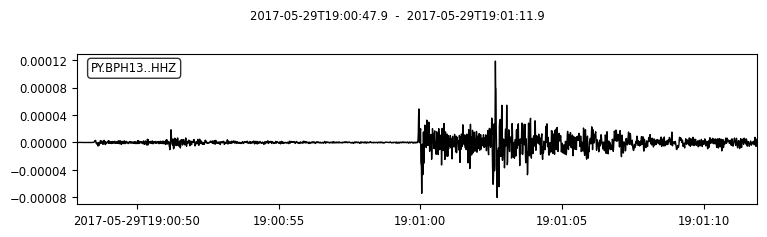

t0: 659.9
t1: 634.9


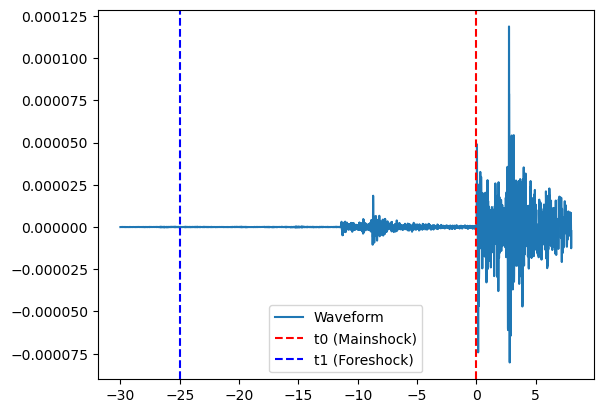

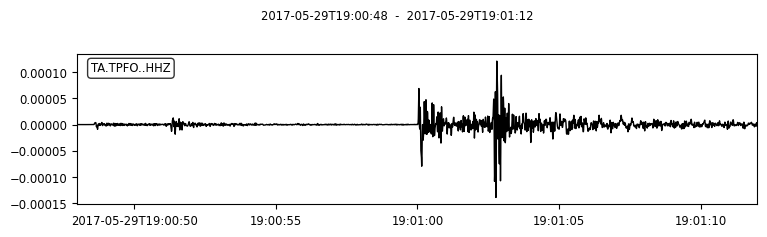

t0: 660.0
t1: 635.0


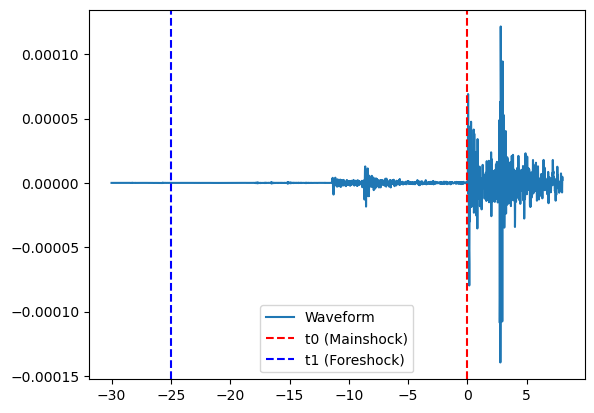

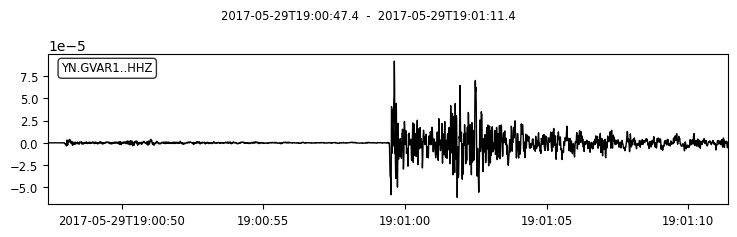

t0: 659.3955
t1: 634.3955


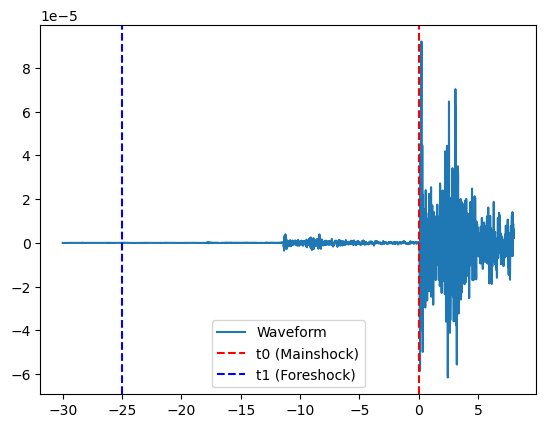

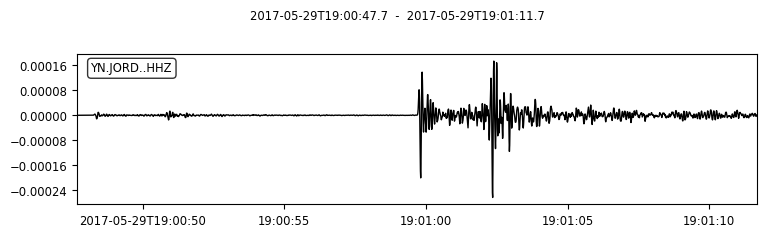

t0: 659.6955
t1: 634.6955


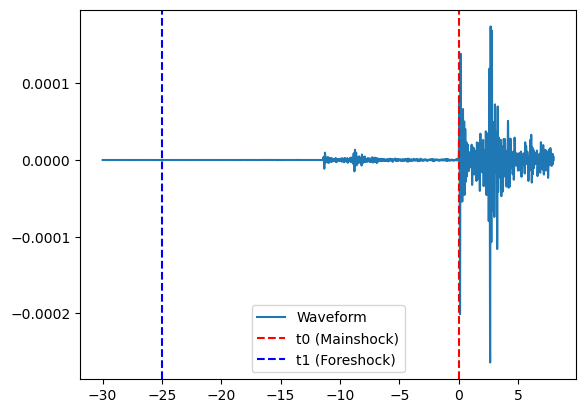

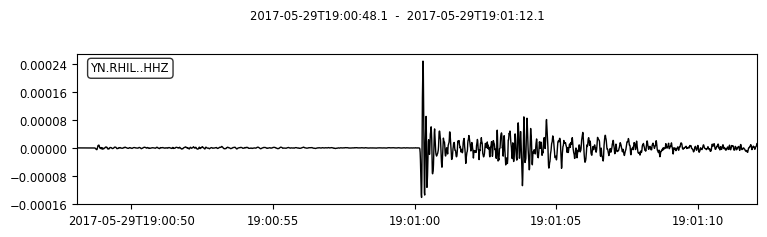

t0: 660.0955
t1: 635.0955


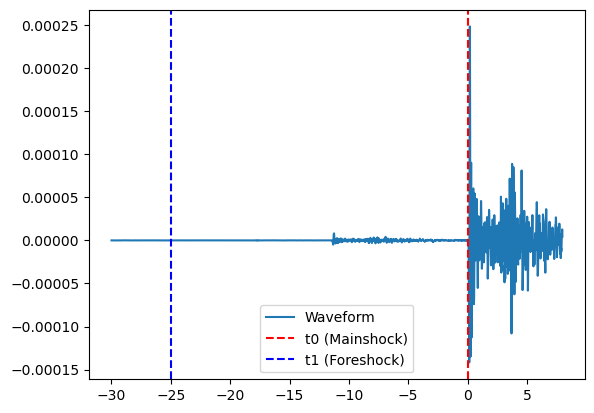

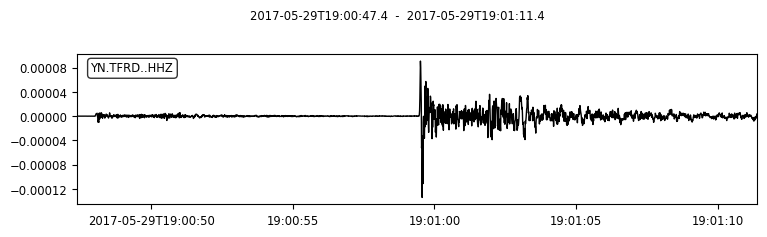

t0: 659.3955
t1: 634.3955


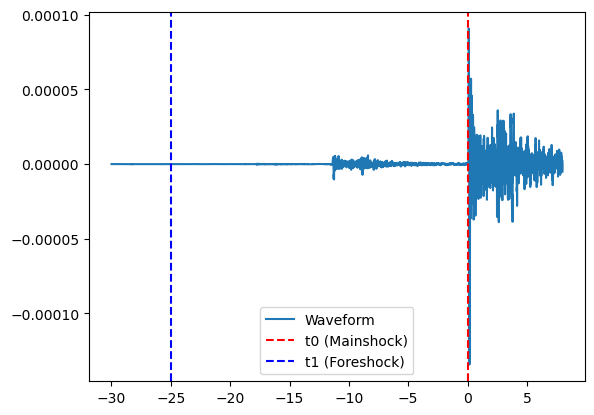

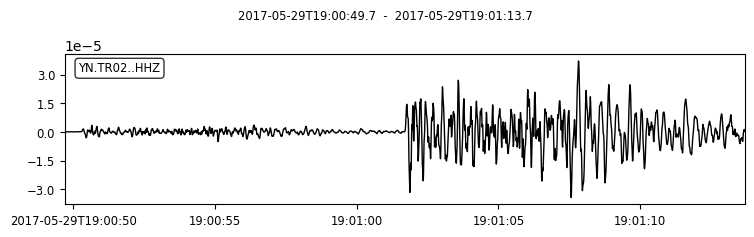

t0: 661.6955
t1: 636.6955


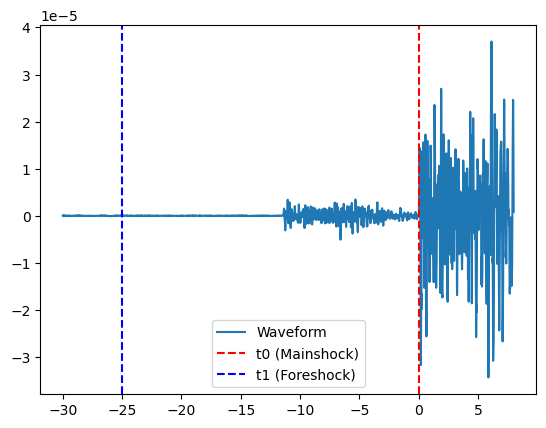

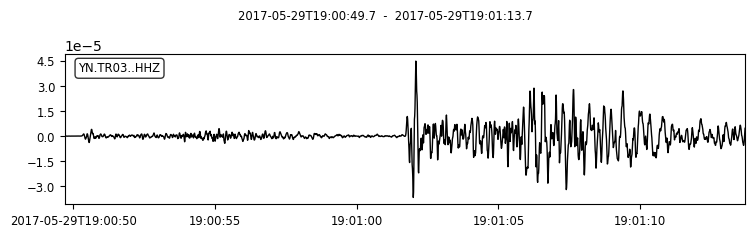

t0: 661.6955
t1: 636.6955


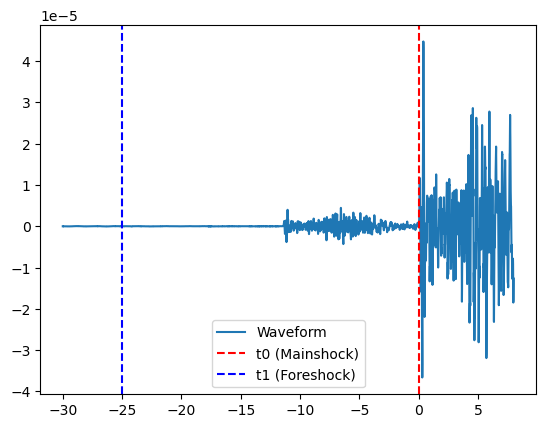

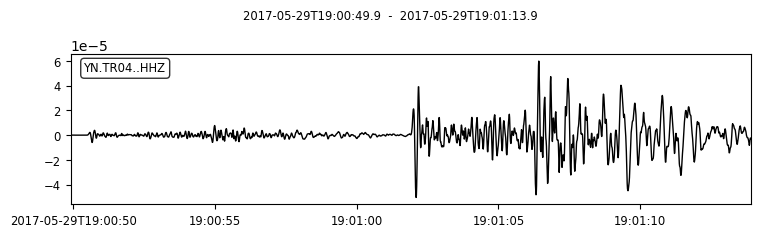

t0: 661.8955
t1: 636.8955


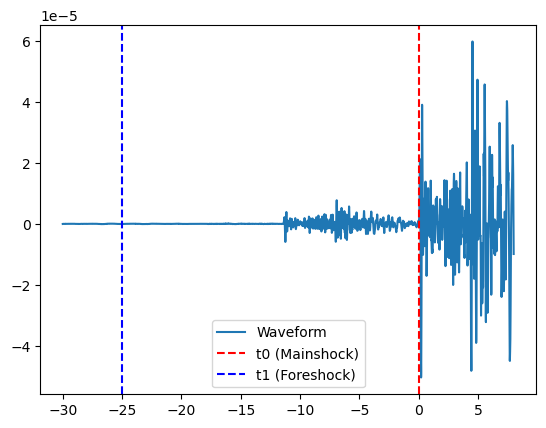

In [19]:
#plots each stations seismograms as python plot and matlab plot with t0 and t1 labelled
for trace in st:
    # Define arrival time (absolute UTC time)
    arrival_time = trace.stats.starttime + trace.stats.t0

    # Plot trace around arrival time
    trace.plot(starttime=arrival_time - 12, endtime=arrival_time + 12)

    # Define mainshock and foreshock times (relative)
    t0 = trace.stats.t0  # Relative start of mainshock
    t1 = trace.stats.t1  # Relative start of foreshock sequence

    print("t0:", t0)
    print("t1:", t1)

    # times2 is relative to `t0`
    times2 = trace.times() - t0  # Shift time axis to t0

    # Select the window around the event 
    ii = np.logical_and(times2 >= -30, times2 <= 8)

    # Plotting waveform and  lines
    plt.plot(times2[ii], trace.data[ii], label="Waveform")
    plt.axvline(0, color='r', linestyle='--', label="t0 (Mainshock)")
    plt.axvline(t1 - t0, color='b', linestyle='--', label="t1 (Foreshock)")  # Adjusted
    plt.legend()
    plt.show()


Change trange1 and 2 where necessary

In [24]:
#Calculates cross correlation
rad=np.array([100.])
xc=phscoh.calcxc(st,st,trange1=[-1,2],trange2=[-25,-0.5],nsint1=1, nsint2=1, mk1='t0',mk2='t0',tpr='slepian')

# xc is an object which contains the cross spectra
print('The cross spectra have shape')
print(xc.xc.shape)

# and then calculate the moveout and coherence from the cross-spectra
xc.calcmvout()
xc.cpfromr()

xc.signalfraction()

The cross spectra have shape
(1638, 40, 1)


1.46484375


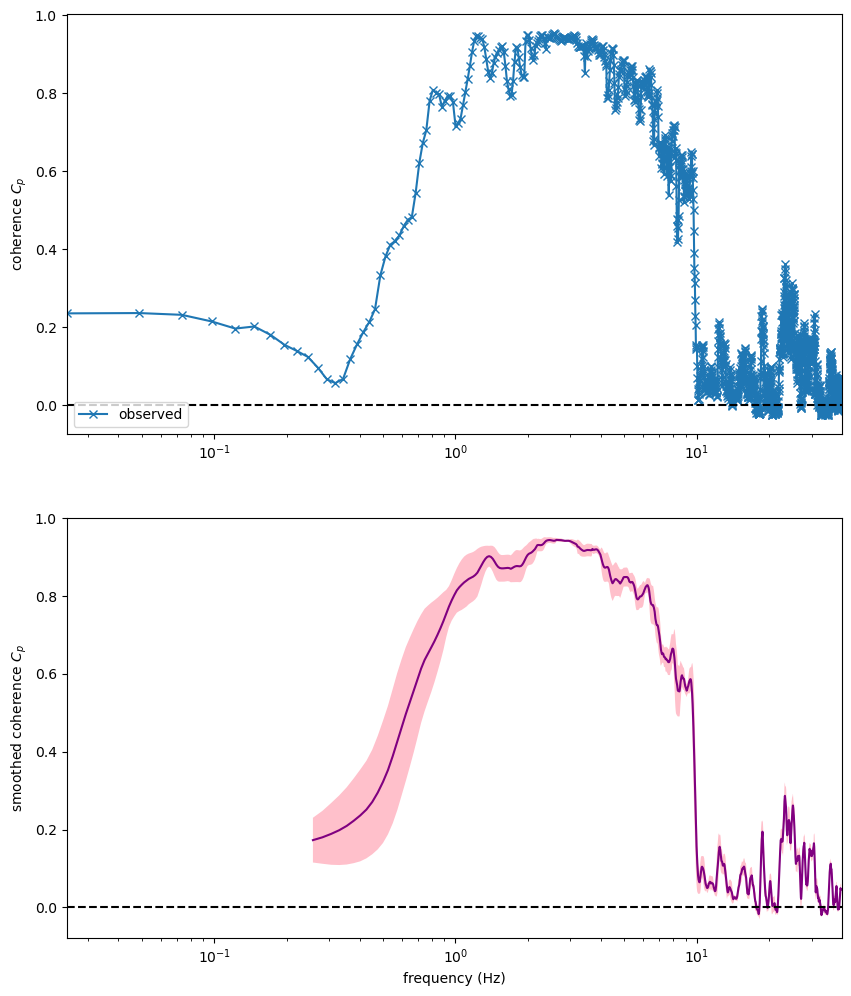

In [25]:
window_size = 20
mean_values = np.array([np.mean(xc.Cp[k:k+window_size]) for k in range(len(xc.Cp) - window_size + 1)])
freq_mean = [np.mean(xc.freq[k:k+window_size]) for k in range(len(xc.freq) - window_size + 1)]

spacing = np.median(np.diff(xc.freq))
window_size_over_dfres=window_size*spacing/xc.dfres
print(window_size_over_dfres)
std_values = np.array([np.std(xc.Cp[k:k+window_size]) for k in range(len(xc.Cp) - window_size + 1)])/np.sqrt(window_size_over_dfres)

import matplotlib as matplotlib
y1=mean_values+std_values
y2=mean_values-std_values
y=np.append(y1,np.flipud(y2))
x=np.append(freq_mean,np.flipud(freq_mean))
xy=np.vstack([x,y]).T  #(Or maybe hstack, or without the transpose)

ply=matplotlib.patches.Polygon(xy,facecolor='pink',visible=True,zorder=0)

f= plt.figure(figsize=(10,12))
pr=plt.subplot(2,1,1)
pc=plt.subplot(2,1,2)

pr.plot(xc.freq,xc.Cp,label='observed',marker="x");
pr.set_ylabel('coherence $C_p$')
pr.legend(loc='lower left')

# Coherence plot
pc.plot(freq_mean, mean_values,color='purple', label='observed')
#pc.plot(xc.freq, np.random.rand(len(xc.freq)), label='with noise')  # Replace with xc.Cpn
pc.set_xlabel('frequency (Hz)')
pc.set_ylabel('smoothed coherence $C_p$')
pc.add_patch(ply)

# Apply log scale and limits
for ph in [pr, pc]:
    ph.set_xlim([xc.freq[0], xc.freq[-1]])
    ph.set_xscale('log')
    #ph.axvline(color='black', linestyle='--', label='expected')
    ph.axhline(0, color='black', linestyle='--')
plt.show()

In [32]:
(0.7*6000)/10

420.0

Running analysis for trange2: [-20, -1]
The cross spectra have shape
(819, 40, 1)
2.001953125


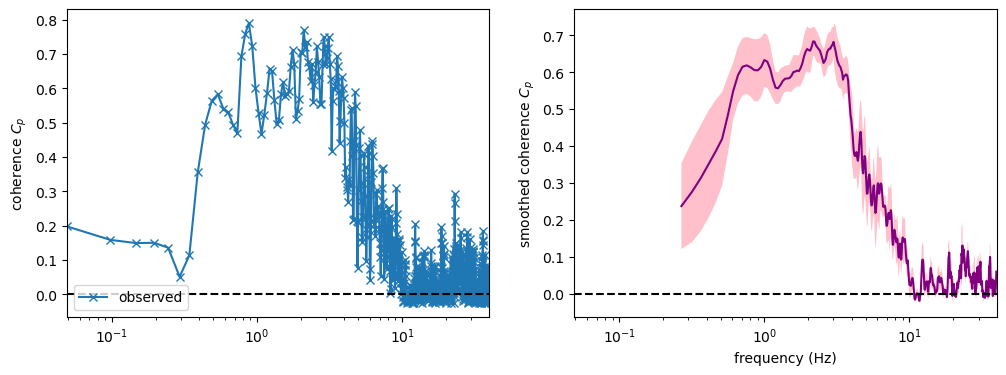

Running analysis for trange2: [-30, -1]
The cross spectra have shape
(1638, 40, 1)
1.0009765625


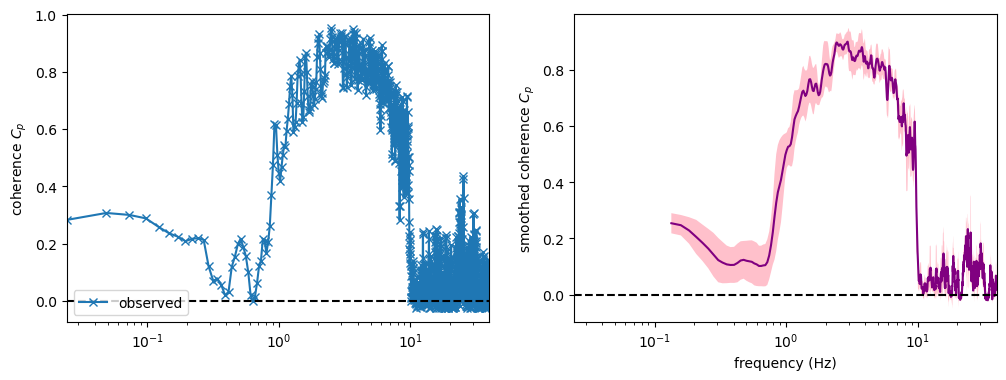

Running analysis for trange2: [-22, -1]
The cross spectra have shape
(1638, 40, 1)
1.0009765625


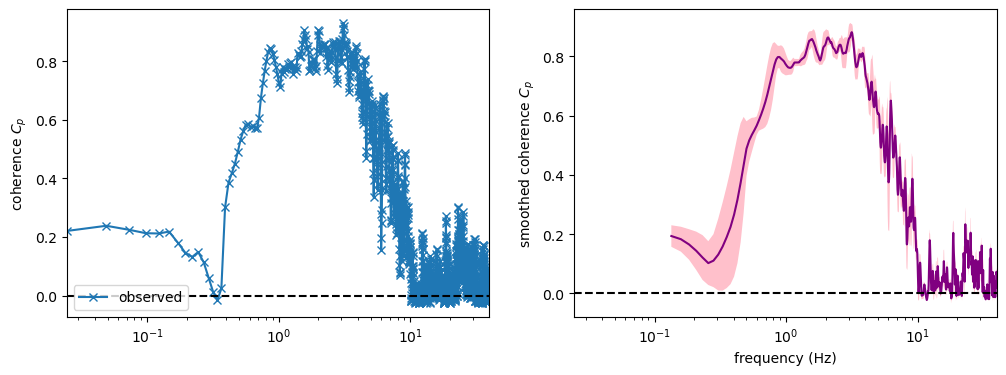

Running analysis for trange2: [-10, -1]
The cross spectra have shape
(409, 40, 1)
4.00390625


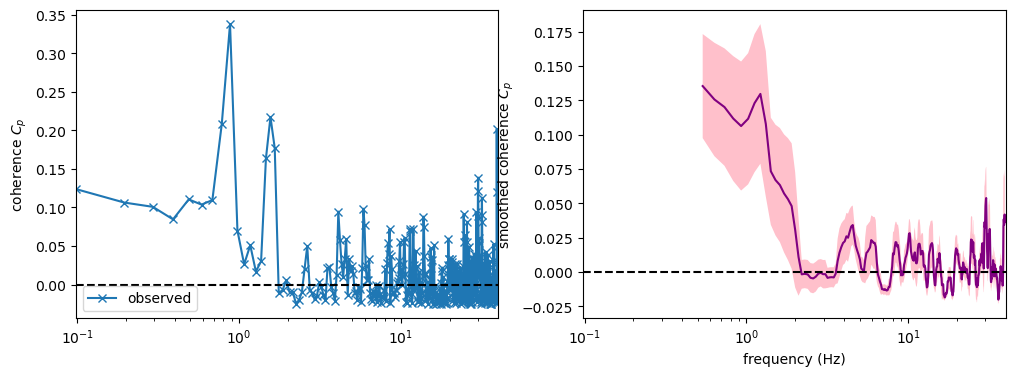

Running analysis for trange2: [-25, -1]
The cross spectra have shape
(1638, 40, 1)
1.0009765625


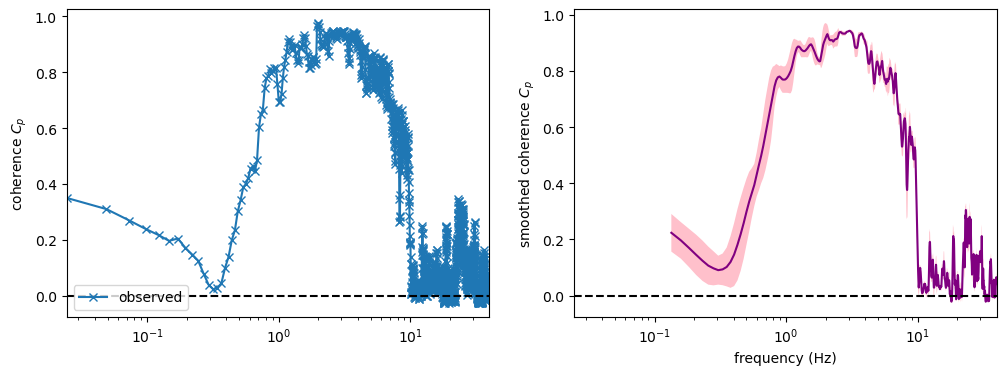

Running analysis for trange2: [-10, -5]
The cross spectra have shape
(204, 40, 1)
8.0078125


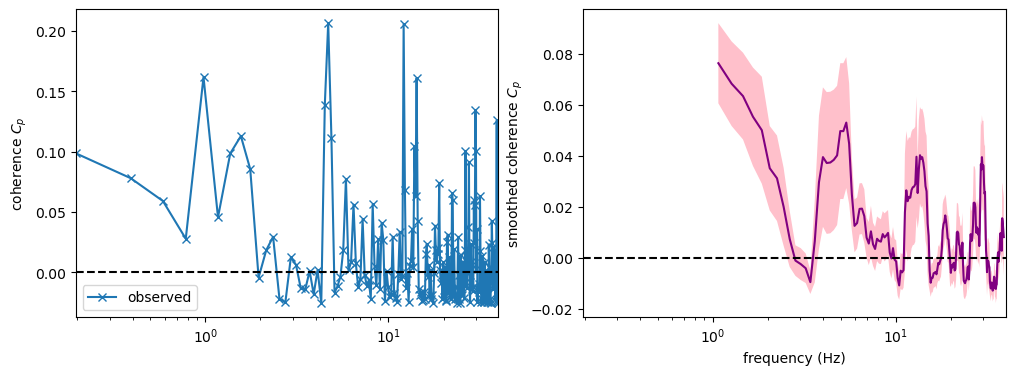

Running analysis for trange2: [-15, -5]
The cross spectra have shape
(409, 40, 1)
4.00390625


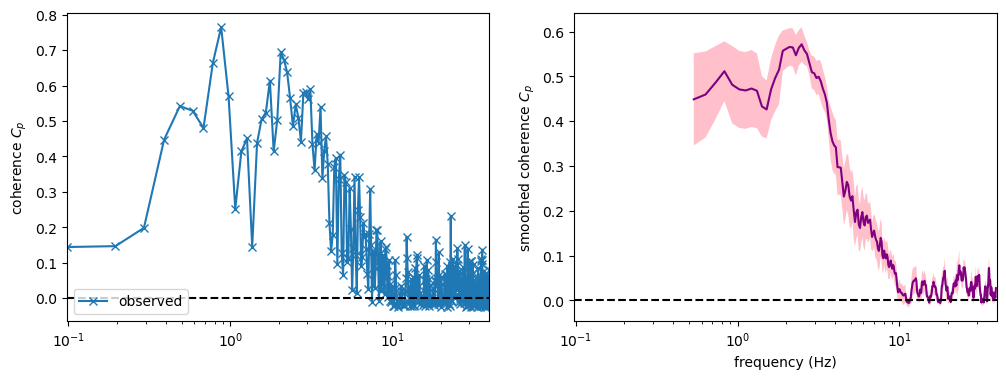

Running analysis for trange2: [-5, -0.5]
The cross spectra have shape
(204, 40, 1)
8.0078125


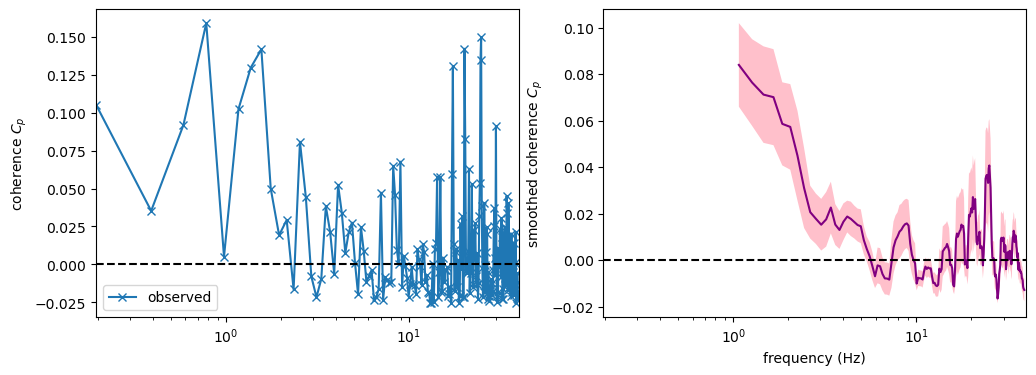

In [31]:
# Define multiple trange2 values to test
trange2_values = [[-20, -1], [-30, -1], [-22,-1], [-10, -1], [-25,-1], [-10,-5],[-15,-5],[-5,-0.5]]# Add more as needed

# Loop through different trange2 values
for trange2 in trange2_values:
    print(f"Running analysis for trange2: {trange2}")
    
    # Compute cross spectra
    xc = phscoh.calcxc(st, st, trange1=[-2, 2.1], trange2=trange2, nsint1=1, nsint2=1, mk1='t0', mk2='t0', tpr='slepian')
    
    print('The cross spectra have shape')
    print(xc.xc.shape)

    # Calculate moveout and coherence
    xc.calcmvout()
    xc.cpfromr()
    xc.signalfraction()

    # Moving window smoothing
    window_size = 10
    mean_values = np.array([np.mean(xc.Cp[k:k+window_size]) for k in range(len(xc.Cp) - window_size + 1)])
    freq_mean = [np.mean(xc.freq[k:k+window_size]) for k in range(len(xc.freq) - window_size + 1)]

    spacing = np.median(np.diff(xc.freq))
    window_size_over_dfres = window_size * spacing / xc.dfres
    print(window_size_over_dfres)

    std_values = np.array([np.std(xc.Cp[k:k+window_size]) for k in range(len(xc.Cp) - window_size + 1)]) / np.sqrt(window_size_over_dfres)

    # Create shaded error region
    y1 = mean_values + std_values
    y2 = mean_values - std_values
    y = np.append(y1, np.flipud(y2))
    x = np.append(freq_mean, np.flipud(freq_mean))
    xy = np.vstack([x, y]).T

    ply = matplotlib.patches.Polygon(xy, facecolor='pink', visible=True, zorder=0)

    # Plot results
    f = plt.figure(figsize=(12, 4))
    pr = plt.subplot(1, 2, 1)
    pc = plt.subplot(1, 2, 2)

    pr.plot(xc.freq, xc.Cp, label='observed', marker="x")
    pr.set_ylabel('coherence $C_p$')
    pr.legend(loc='lower left')

    # Coherence plot
    pc.plot(freq_mean, mean_values, color='purple', label='observed')
    pc.set_xlabel('frequency (Hz)')
    pc.set_ylabel('smoothed coherence $C_p$')
    pc.add_patch(ply)

    # Apply log scale and limits
    for ph in [pr, pc]:
        ph.set_xlim([xc.freq[0], xc.freq[-1]])
        ph.set_xscale('log')
        ph.axhline(0, color='black', linestyle='--')

    plt.show()

Check again all SNR are above 10 dB

In [33]:
def compute_snr(trace, noise_start, noise_end, signal_start, signal_end):
    """
    Compute the Signal-to-Noise Ratio (SNR) for a given ObsPy Trace.

    :param trace: ObsPy Trace object containing waveform data
    :param noise_start: Start time of noise window (relative to trace.stats.starttime)
    :param noise_end: End time of noise window
    :param signal_start: Start time of signal window
    :param signal_end: End time of signal window
    :return: SNR value in decibels (dB)
    """
    # Extract the noise and signal windows
    noise_window = trace.slice(trace.stats.starttime + noise_start, trace.stats.starttime + noise_end)
    signal_window = trace.slice(trace.stats.starttime + signal_start, trace.stats.starttime + signal_end)

    # Compute RMS (Root Mean Square) amplitudes
    noise_rms = np.sqrt(np.mean(noise_window.data**2))
    signal_rms = np.sqrt(np.mean(signal_window.data**2))

    # Compute SNR in dB
    snr = 20 * np.log10(signal_rms / noise_rms) if noise_rms > 0 else np.inf  # Avoid division by zero

    return snr


In [34]:
# Define time windows (relative to the start of each trace)
noise_start = t1-150       # Start of noise window (in seconds)
noise_end = t1-100        # End of noise window
signal_start = t0-25     # Start of signal window
signal_end = t0      # End of signal window

# Compute SNR for each trace
for tr in st:
    snr = compute_snr(tr, noise_start, noise_end, signal_start, signal_end)
    print(f"Station {tr.stats.station} - SNR: {snr:.2f} dB")



Station BZN - SNR: 39.57 dB
Station FRD - SNR: 50.28 dB
Station KNW - SNR: 47.69 dB
Station LVA2 - SNR: 39.52 dB
Station PFO - SNR: 45.13 dB
Station RDM - SNR: 38.47 dB
Station RRSP - SNR: 61.00 dB
Station SMER - SNR: 16.79 dB
Station SND - SNR: 37.78 dB
Station TMSP - SNR: 55.30 dB
Station TRO - SNR: 44.07 dB
Station DGR - SNR: 30.67 dB
Station PLM - SNR: 15.45 dB
Station B082 - SNR: 47.72 dB
Station B084 - SNR: 44.57 dB
Station B086 - SNR: 22.16 dB
Station B087 - SNR: 46.10 dB
Station B088 - SNR: 27.40 dB
Station B093 - SNR: 53.44 dB
Station BPH01 - SNR: 47.37 dB
Station BPH02 - SNR: 47.21 dB
Station BPH03 - SNR: 47.16 dB
Station BPH04 - SNR: 46.62 dB
Station BPH05 - SNR: 47.79 dB
Station BPH06 - SNR: 48.35 dB
Station BPH07 - SNR: 46.35 dB
Station BPH08 - SNR: 46.69 dB
Station BPH09 - SNR: 44.92 dB
Station BPH10 - SNR: 37.76 dB
Station BPH11 - SNR: 50.65 dB
Station BPH12 - SNR: 47.26 dB
Station BPH13 - SNR: 46.81 dB
Station TPFO - SNR: 49.87 dB
Station GVAR1 - SNR: 51.44 dB
Station J

Change latitude and longitude to the Earthquake's location

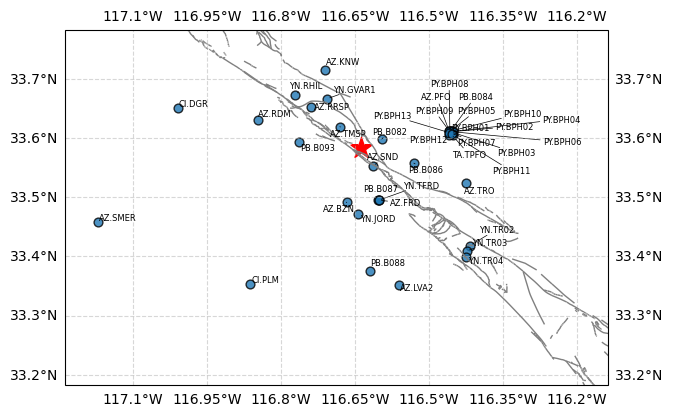

In [51]:
#Plots map of stations relative to earthquake's location
import cartopy.crs as ccrs
import geopandas as gpd

# Earthquake epicenter
eq_lat, eq_lon =33.5825,	-116.6376667

# Haversine formula to compute distances (in km)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert to radians
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c  # Distance in km

# Function to get station latitude & longitude from inventory
def get_station_coordinates(inv, network, station):
    for net in inv:
        if net.code == network:
            for sta in net.stations:
                if sta.code == station:
                    return sta.latitude, sta.longitude
    return None, None  # Return None if station is not found

# Extract distances for all stations in st_filt
station_lats, station_lons, distances, labels = [], [], [], []

for trace in st:
    net_code = trace.stats.network  # Network code 
    sta_code = trace.stats.station  # Station code

    lat, lon = get_station_coordinates(inv, net_code, sta_code)
    
    if lat is not None and lon is not None:
        station_lats.append(lat)
        station_lons.append(lon)
        distances.append(haversine(eq_lat, eq_lon, lat, lon))
        labels.append(f"{net_code}.{sta_code}")  # Store station labels

# Create the map
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw={"projection": ccrs.PlateCarree()})

# Set map extent 
ax.set_extent([eq_lon+0.5, eq_lon-0.6, eq_lat-0.4, eq_lat+0.2], crs=ccrs.PlateCarree())

# Plot stations with color-coded distance
scatter = ax.scatter(station_lons, station_lats, edgecolor='black', s=40, alpha=0.8, transform=ccrs.PlateCarree())

# Plot earthquake epicenter
ax.scatter(eq_lon, eq_lat, color='red', marker='*', s=250, label='Earthquake', transform=ccrs.PlateCarree())

# label stations
from adjustText import adjust_text
texts = []  # Store text objects
for i, label in enumerate(labels):
    text_obj = ax.text(station_lons[i], station_lats[i], label, fontsize=6, transform=ccrs.PlateCarree())
    texts.append(text_obj)  # Add each text object to the list
# Automatically adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

gl = ax.gridlines(draw_labels=True, linestyle="--", alpha=0.5)
os.chdir('C:/Users/lan66/4th year project/2nd term')

sj_fault = gpd.read_file("San_Jacinto_Fault_2.geojson")
sj_fault.plot(ax=ax, color="grey", linewidth=1)

# Show the plot
plt.show()

C:\Users\lan66\AppData\Local\Temp\ipykernel_6572\4230600461.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


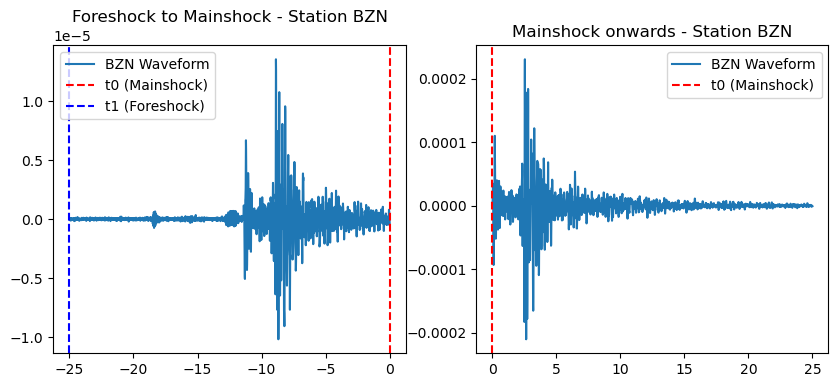

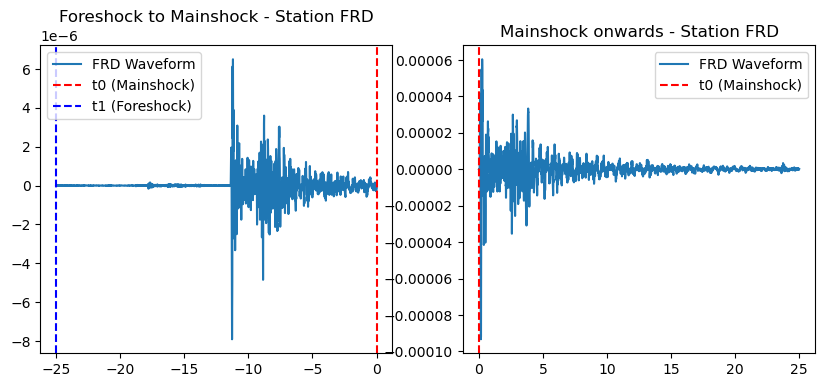

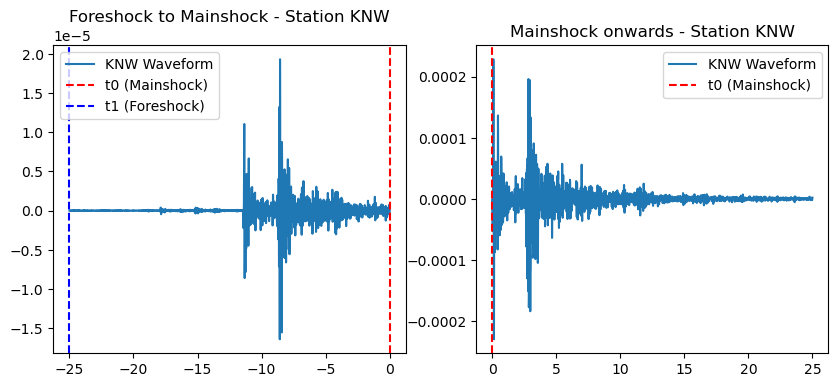

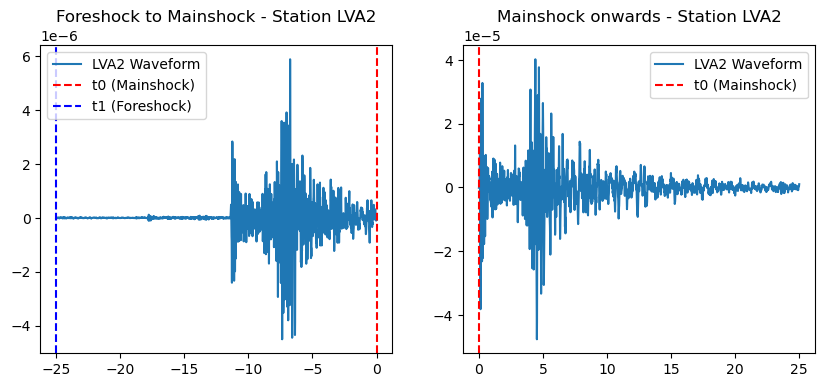

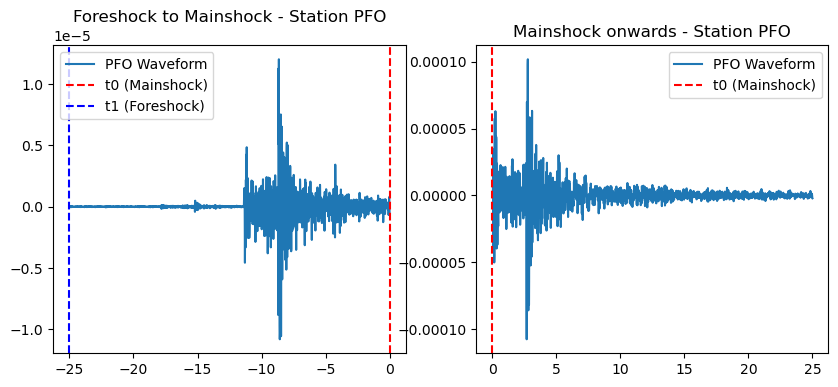

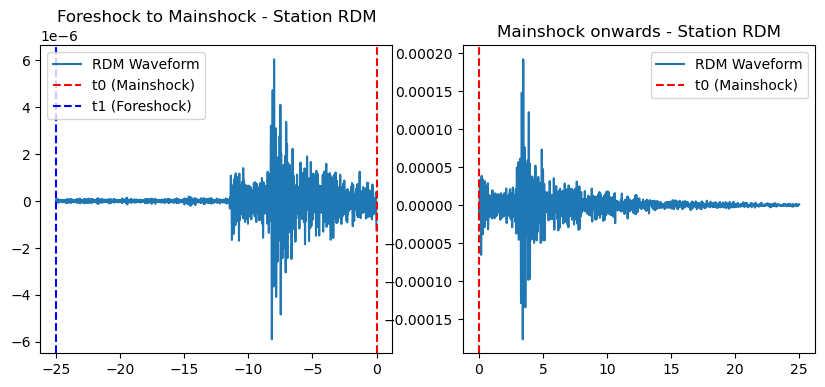

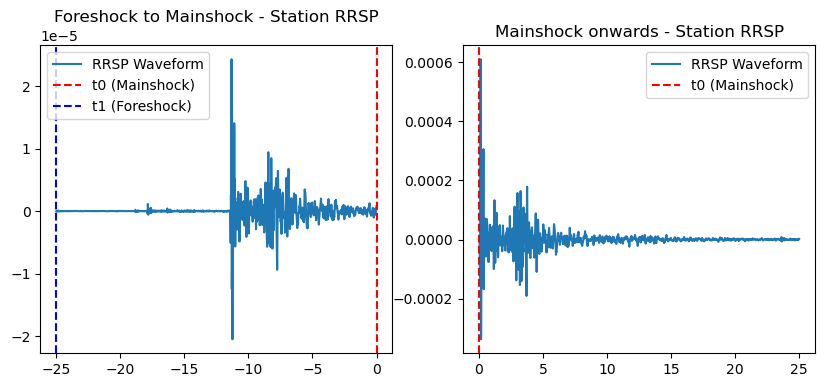

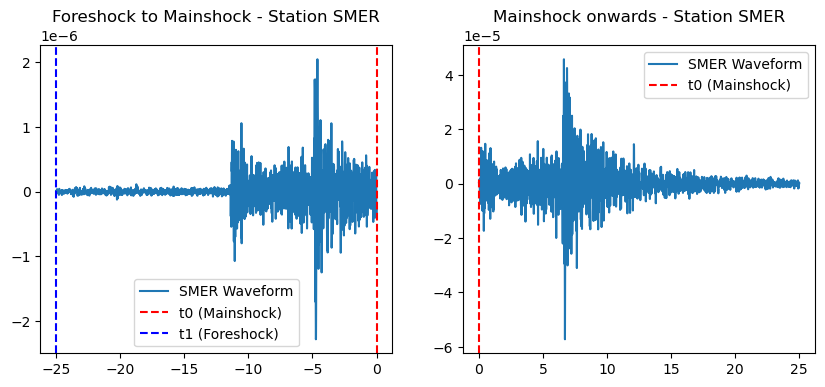

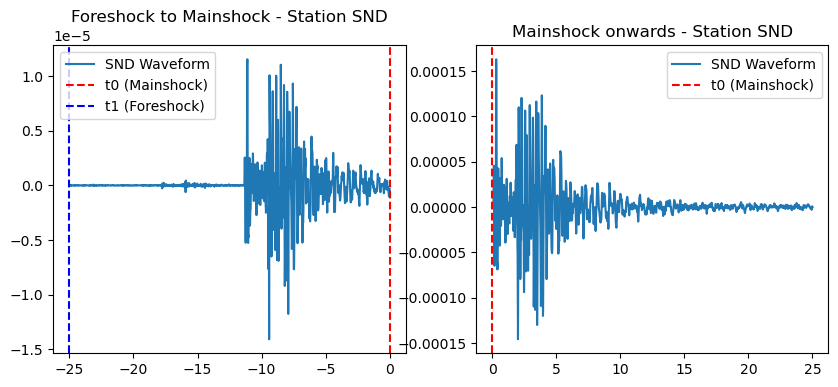

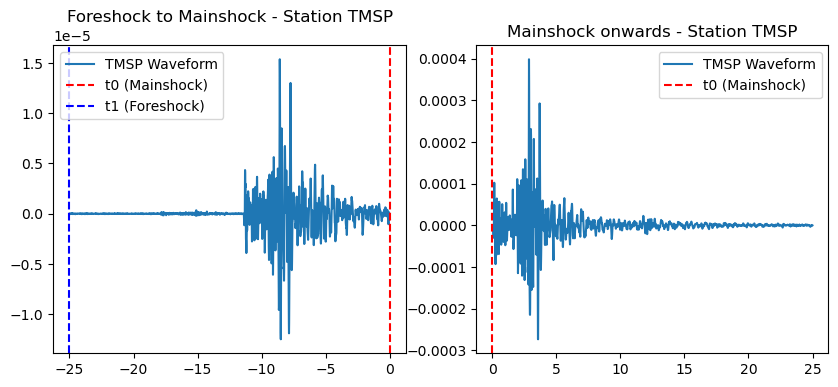

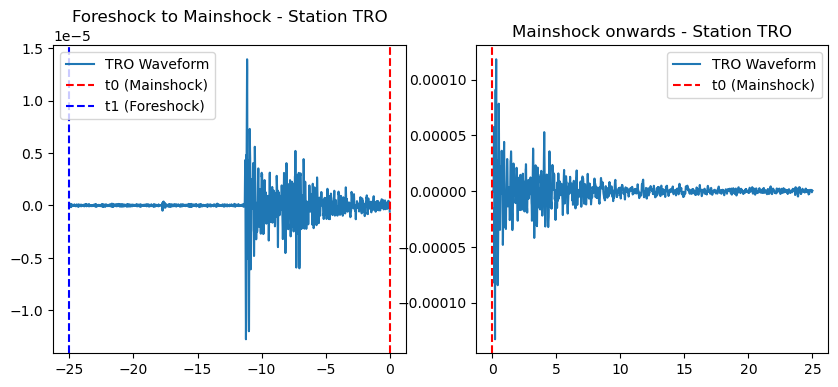

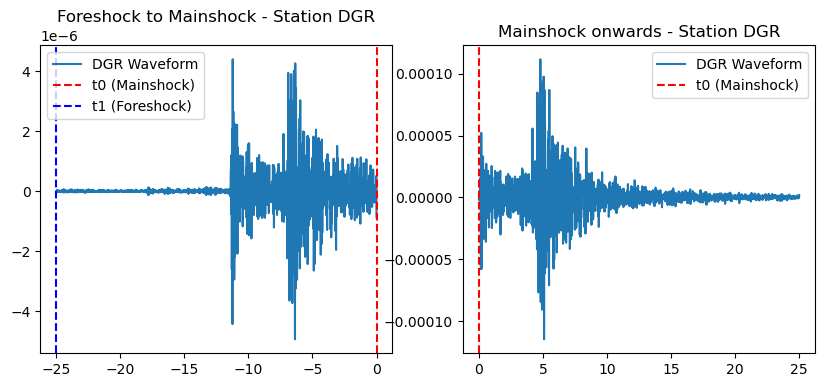

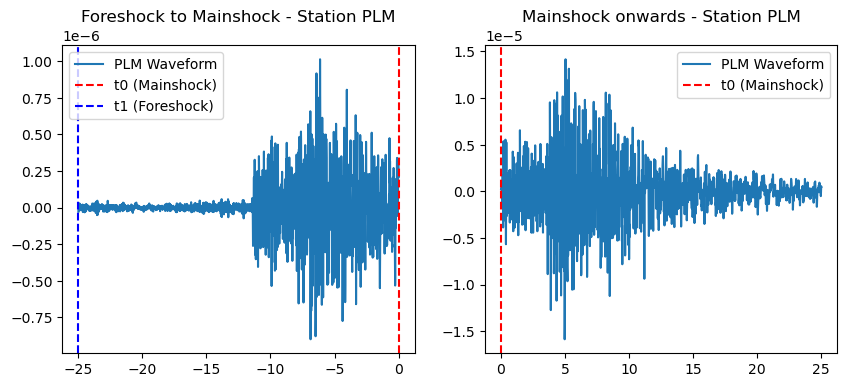

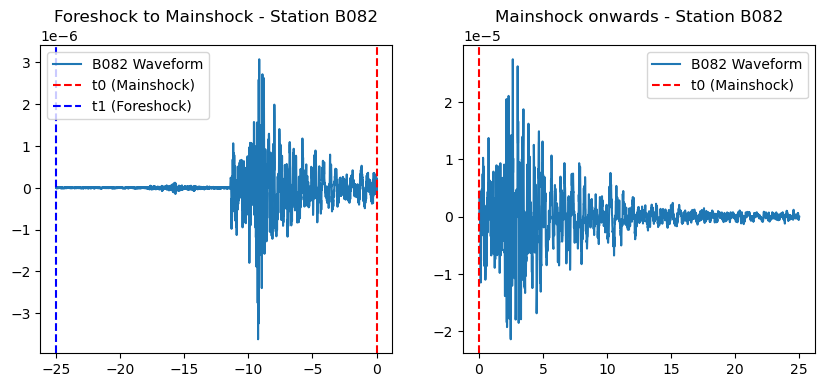

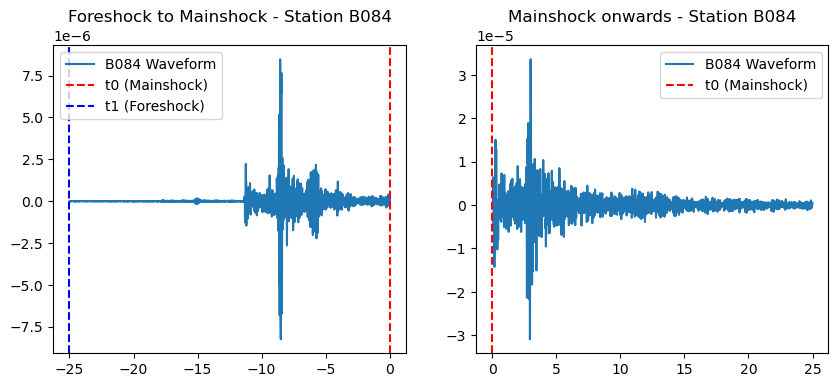

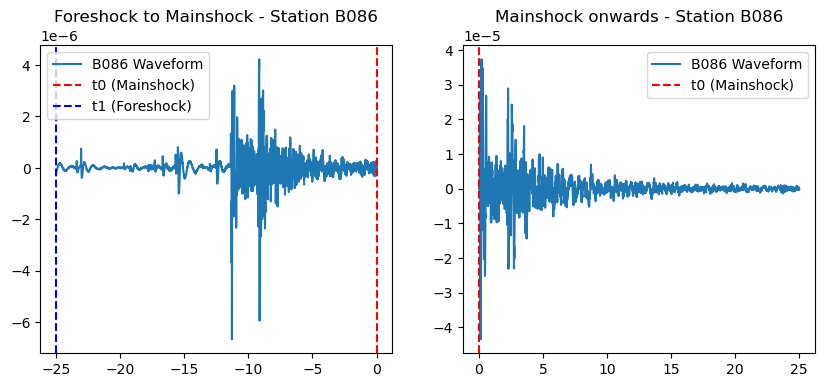

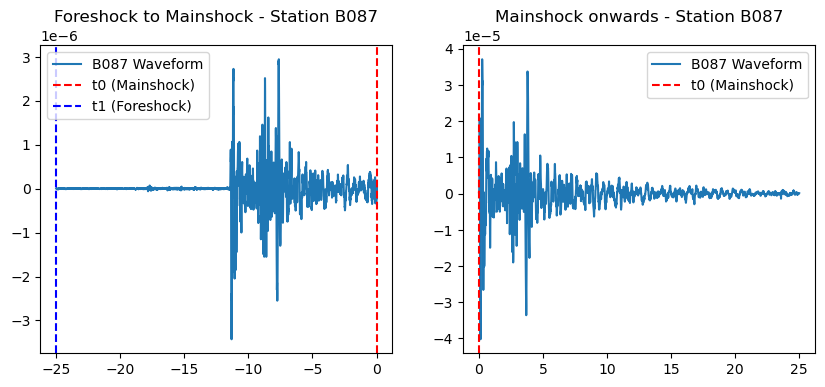

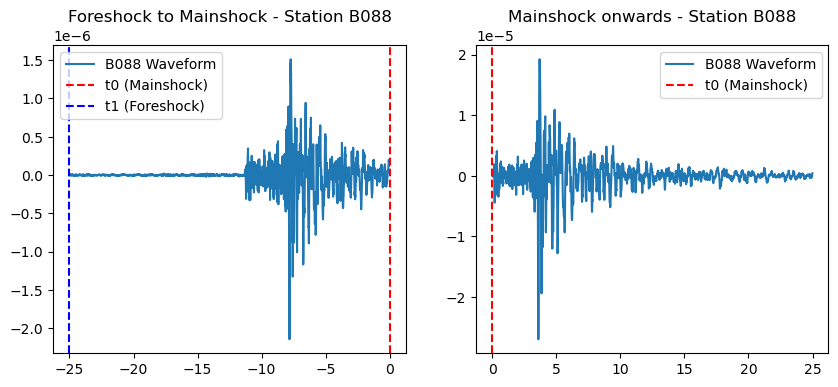

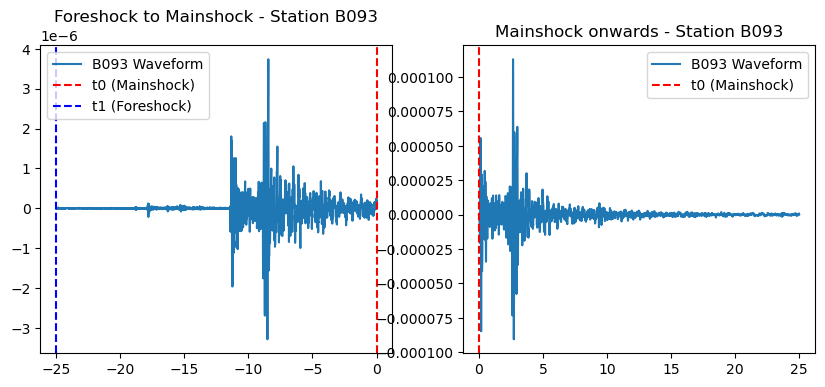

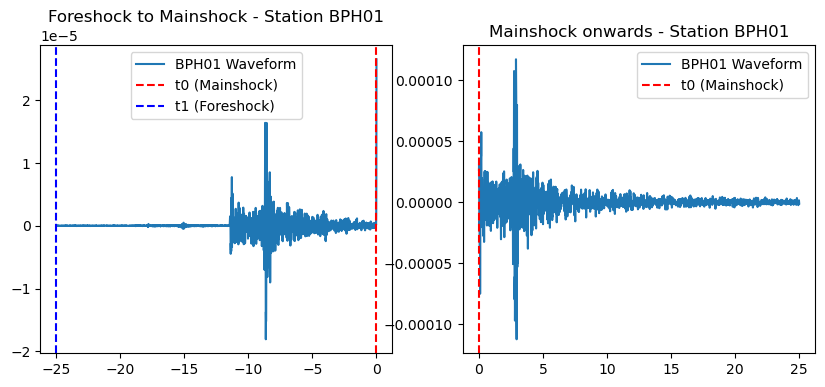

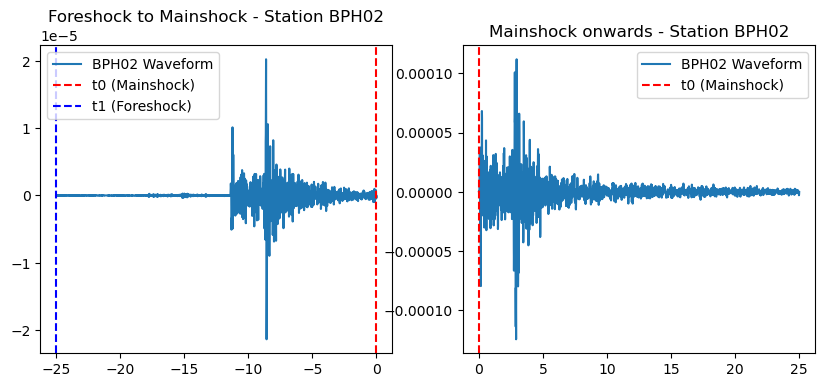

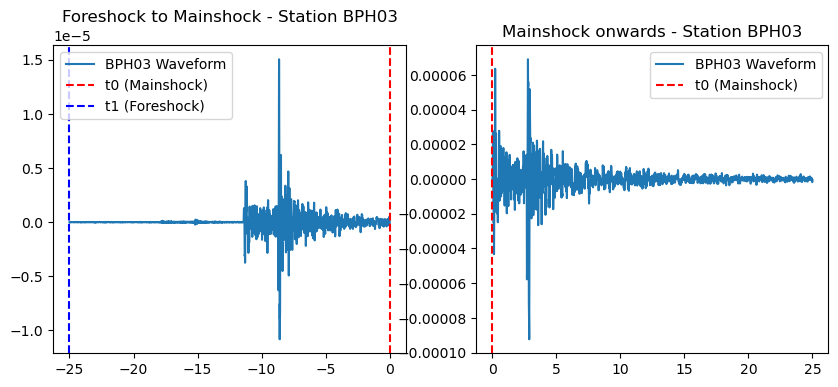

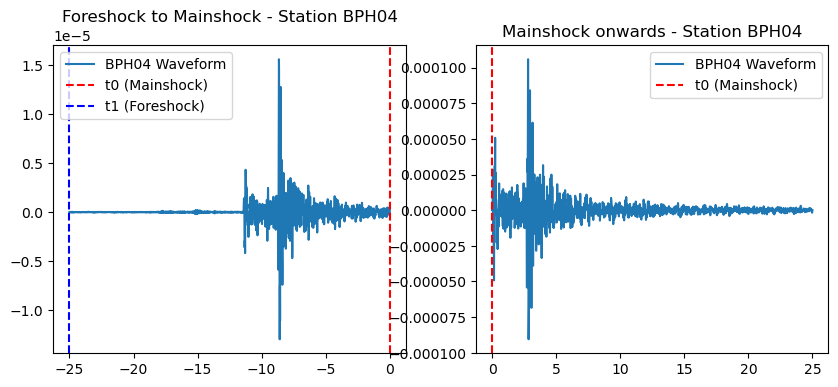

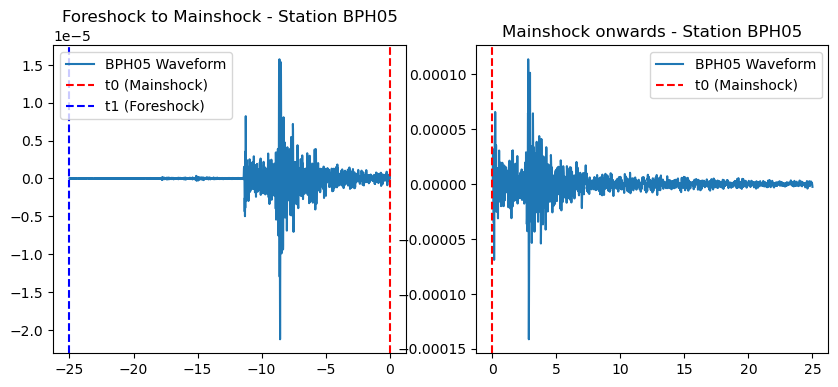

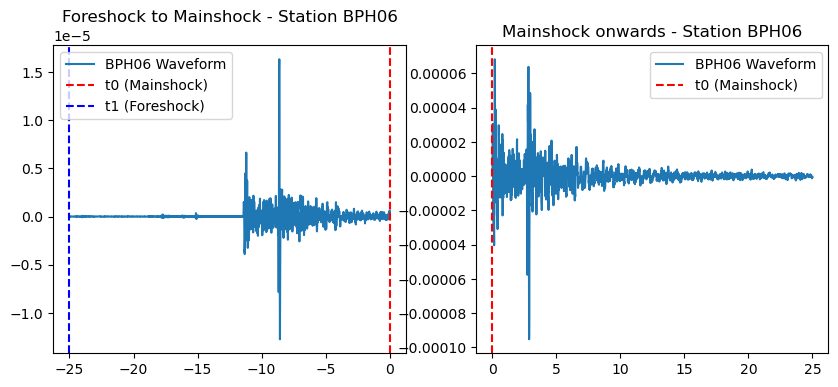

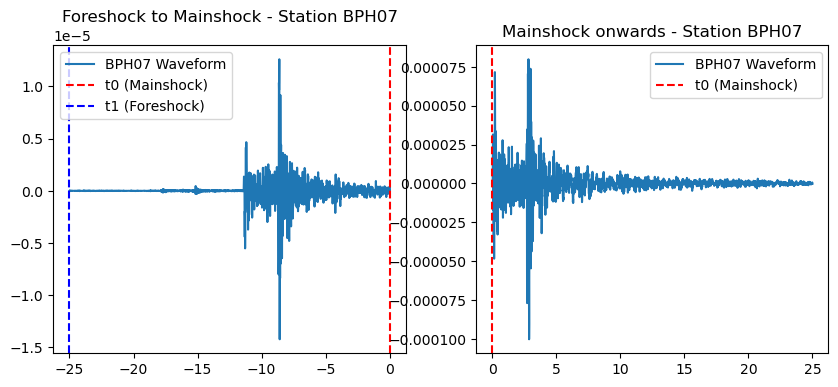

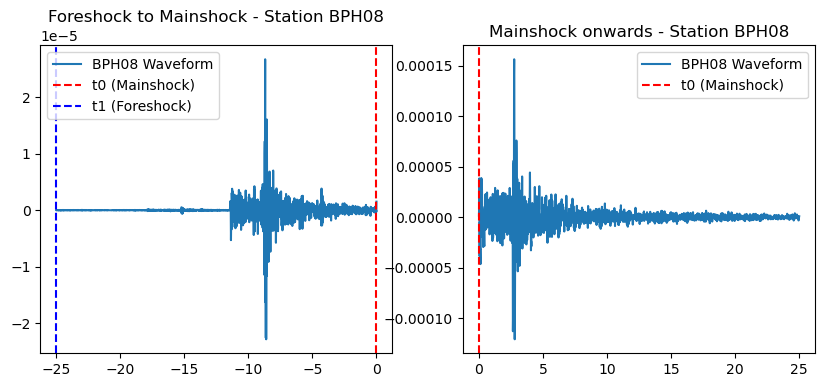

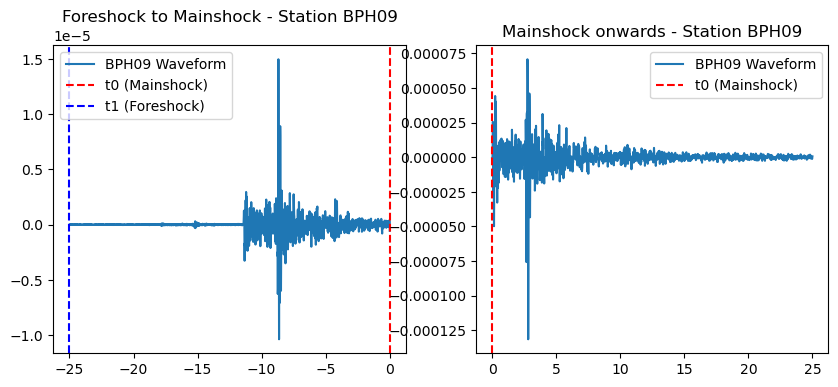

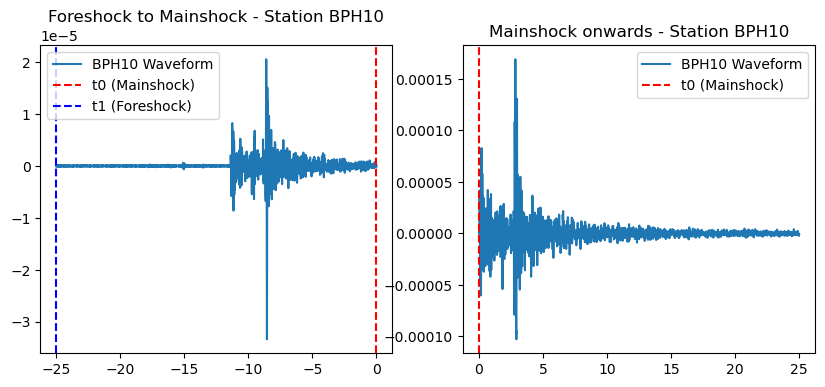

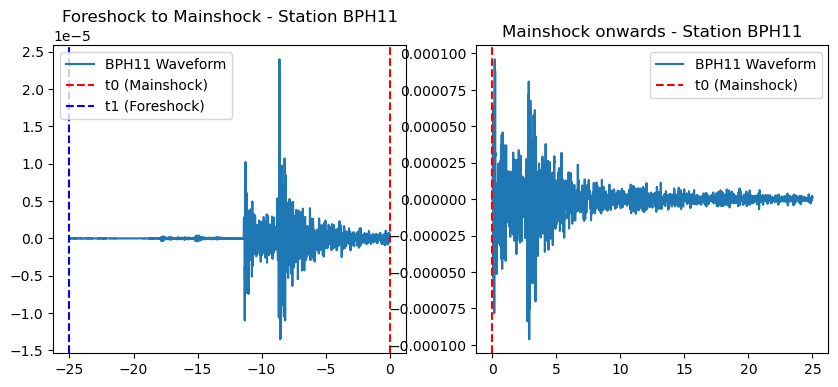

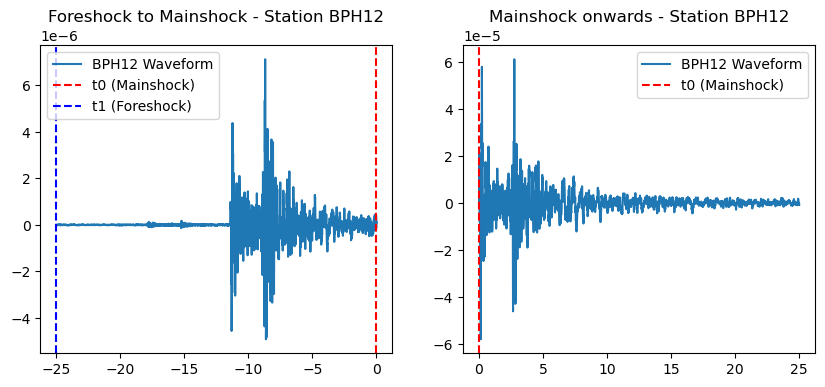

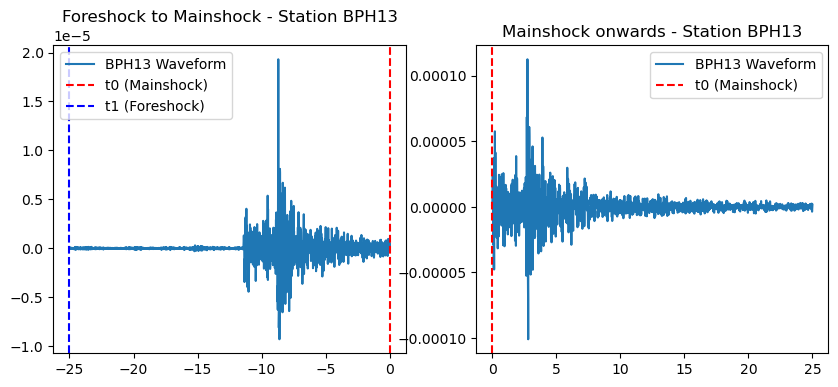

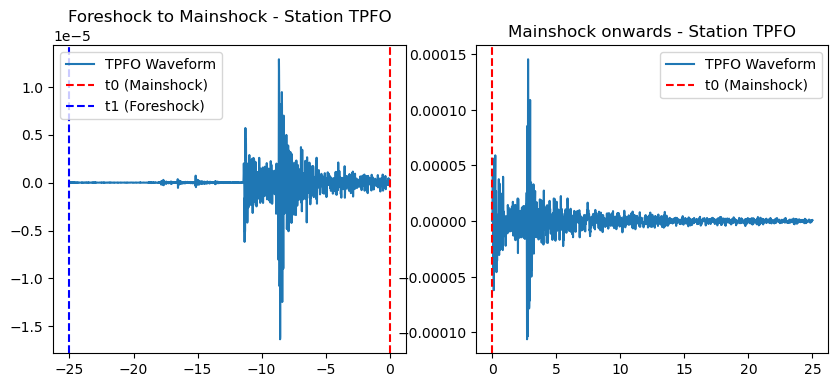

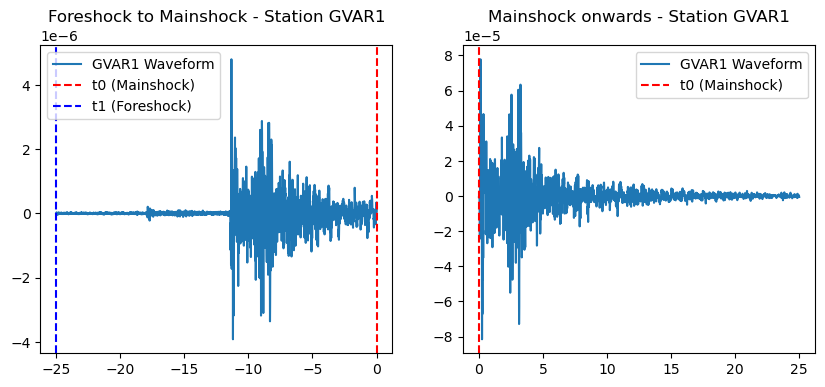

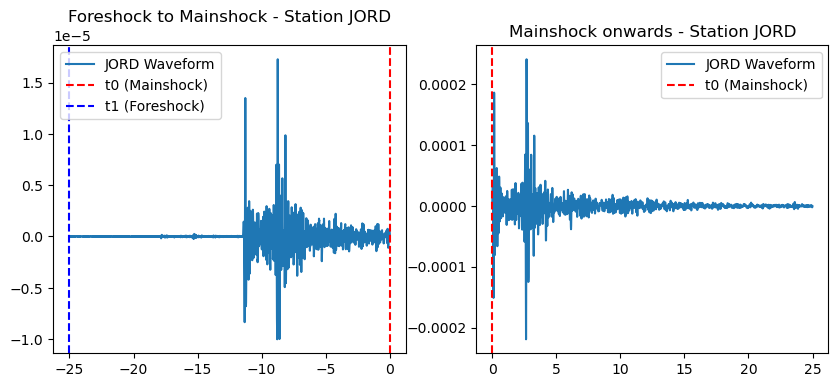

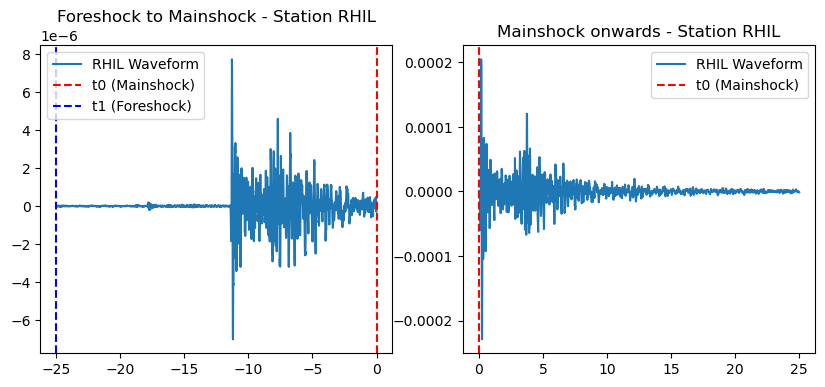

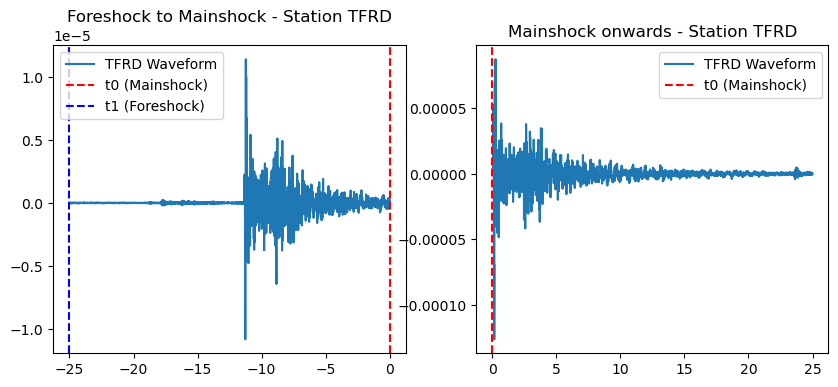

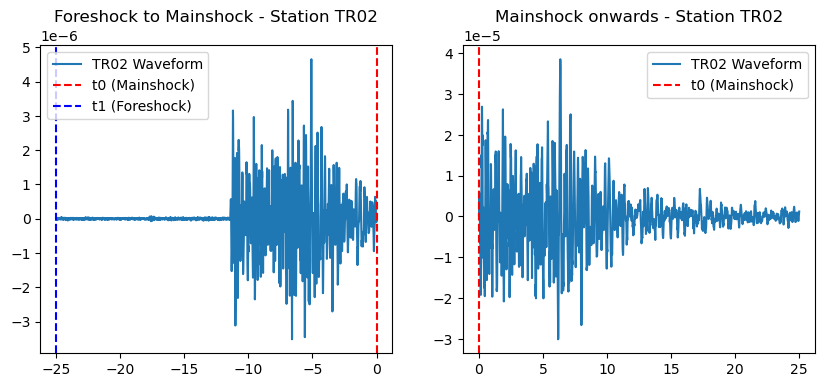

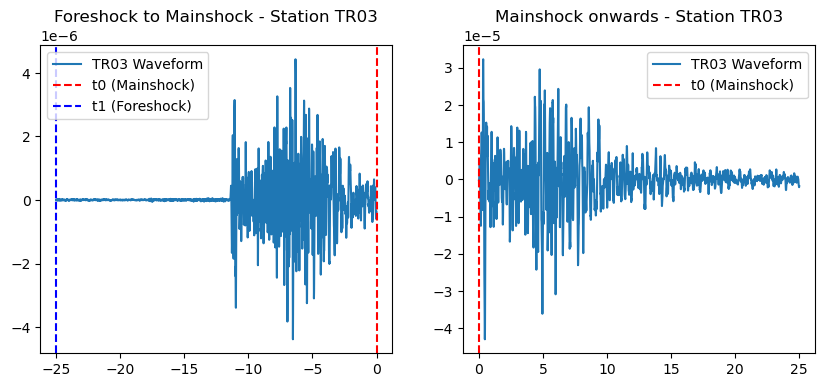

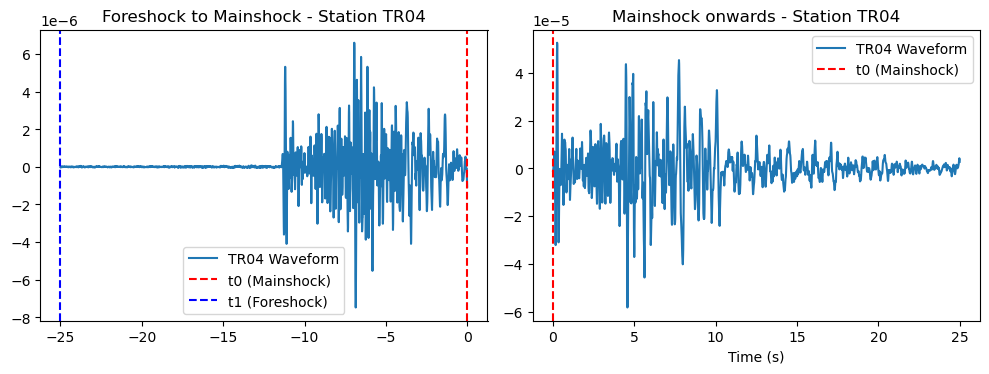

In [53]:
#plotting seperate seismogram for inspection of foreshocks and mainshocks
for trace in st:
    trace.filter("highpass", freq=1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    station = trace.stats.station  # Get station name
    
    t0 = trace.stats.t0  # Relative start of mainshock
    t1 = trace.stats.t1  # Relative start of foreshock sequence
    # times2 is relative to `t0`
    times2 = trace.times() - t0  # Shift time axis to t0


    # Select window for foreshock to mainshock (t1 to t0)
    mask1 = np.logical_and(times2 >= (t1-t0), times2 <= 0)
    ax1.plot(times2[mask1], trace.data[mask1], label=f"{station} Waveform")
    ax1.axvline(0, color='r', linestyle='--', label="t0 (Mainshock)")
    ax1.axvline(t1-t0, color='b', linestyle='--', label="t1 (Foreshock)")
    ax1.set_title(f"Foreshock to Mainshock - Station {station}")
    ax1.legend()

    # Select window for mainshock to aftershock (t0 to t0+15)
    mask2 = np.logical_and(times2 >= 0, times2 <= 25)
    ax2.plot(times2[mask2], trace.data[mask2], label=f"{station} Waveform")
    ax2.axvline(0, color='r', linestyle='--', label="t0 (Mainshock)")
    ax2.set_title(f"Mainshock onwards - Station {station}")
    ax2.legend()
# Improve layout
plt.xlabel("Time (s)")
plt.tight_layout()
plt.show()